In [72]:
import uproot
import ROOT as r
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import awkward as ak
import array as arr
import pandas as pd
import os

In [2]:
#f_overlay = uproot.open("1EventOverlay_82725_NOpmtnoise_20250929T143748-mcana.root")
f_overlay = uproot.open("/nashome/m/micarrig/icarus/pmt/v10_06_00_01p04/overlay_isoTree.root")
t_overlay = f_overlay["mcana/mcwfs"]

#f_mcv4 = uproot.open("stage0_mcv4_tree.root")
f_mcv4 = uproot.open("/nashome/m/micarrig/icarus/pmt/v10_06_00_01p04/mcV4_isoTree.root")
t_mcv4 = f_mcv4["mcana/mcwfs"]

#f_mc = uproot.open("stage0_mc_tree.root")
f_mc = uproot.open("/nashome/m/micarrig/icarus/pmt/v10_06_00_01p04/mcStandard_isoTree.root")
t_mc = f_mc["mcana/mcwfs"]

#f_data = uproot.open("stage0_data_tree.root")
f_data = uproot.open("/nashome/m/micarrig/icarus/pmt/v10_06_00_01p04/data_isoTree.root")
t_data = f_data["mcana/mcwfs"]

FileNotFoundError: file not found

    '/nashome/m/micarrig/icarus/pmt/v10_06_00_01p04/overlay_isoTree.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.


In [ ]:
t_data.keys()

['run',
 'event',
 'timestamp',
 'channel',
 'nsize',
 'wfstart',
 'baselines',
 'wf',
 'n_ophits',
 'start_time',
 'peak_time',
 'rise_time',
 'time_width',
 'amplitude',
 'integral',
 'hitpeak',
 'hitstart',
 'hitend',
 'n_simphotons',
 'sim_time',
 'sim_energy',
 'sim_sample',
 'sim_start_x',
 'sim_start_y',
 'sim_start_z']

In [3]:
class Variable:
    def __init__(self, name, bins, range):
        """
        Initialize a Variable object.

        Parameters:
        - name (str): Name of the variable.
        - bins (int): Number of bins for the histogram.
        - range (tuple): Range of the histogram as (min, max)
        """
        self.name = name
        self.bins = bins
        self.range = range

    def __repr__(self):
        """
        Return a string representation of the Variable object.
        """
        return f"Variable(name='{self.name}', bins={self.bins}, range={self.range})"


variables_to_plot = [
    Variable(name='rise_time', bins=100, range=(0, 50)),
    Variable(name='integral', bins=50, range=(0, 400)),
    Variable(name='amplitude', bins=75, range=(0, 500)),
    # Variable(name='wfstart', bins=30, range=(0, 30)),
    # Variable(name='baselines', bins=150, range=(14990, 15005)),
    # Variable(name='n_ophits', bins=100, range=(0, 100)),
    Variable(name='start_time', bins=40, range=(0, 40)),
    Variable(name='peak_time', bins=40, range=(0, 40)),
    Variable(name='time_width', bins=100, range=(0, 0.2)),
    Variable(name='hitpeak', bins=120, range=(0, 12000)),
    Variable(name='hitstart', bins=120, range=(0, 12000)),
    Variable(name='hitend', bins=120, range=(0, 12000)),
    Variable(name='timeIsolated', bins=2, range=(0, 2)),

]

In [ ]:
xrdfs root://fndcadoor.fnal.gov:1094

ls: cannot access '/pnfs/icarus/scratch/users/': No such file or directory


In [94]:

step_size = '10 MB'

all_vars = [var.name for var in variables_to_plot]
all_vars.append('amplitude')  # For selection
all_vars = list(set(all_vars))

print("variables", all_vars)

# datasets = {
#     'Overlay': uproot.iterate("stage0_overlay_tree.root:mcana/mcwfs", all_vars, step_size=step_size),
#     'MC v4': uproot.iterate("stage0_mcv4_tree.root:mcana/mcwfs", all_vars, step_size=step_size),
#     'MC Standard': uproot.iterate("stage0_mc_tree.root:mcana/mcwfs", all_vars, step_size=step_size),
#     'Data': uproot.iterate("stage0_data_tree.root:mcana/mcwfs", all_vars, step_size=step_size)
# }

f_overlay = []
f_data = []
with open('/nashome/m/micarrig/icarus/pmt/v10_06_00_01p04/overlayFiles.list', 'r') as f:
    for line in f:
        f_overlay.append(line.strip()+":mcana/mcwfs")
with open('/nashome/m/micarrig/icarus/pmt/v10_06_00_01p04/dataFiles.list', 'r') as f:
    for line in f:
        f_data.append(line.strip()+":mcana/mcwfs")

datasets = {
    # 'Overlay': uproot.iterate("/nashome/m/micarrig/icarus/pmt/v10_06_00_01p04/overlay_isoTree.root:mcana/mcwfs", all_vars, step_size=step_size),
    'Overlay': uproot.iterate(f_overlay, all_vars, step_size=step_size),
    # 'MC v4': uproot.iterate("/nashome/m/micarrig/icarus/pmt/v10_06_00_01p04/mcV4_isoTree.root:mcana/mcwfs", all_vars, step_size=step_size),
    # 'MC Standard': uproot.iterate("/nashome/m/micarrig/icarus/pmt/v10_06_00_01p04/mcStandard_isoTree.root:mcana/mcwfs", all_vars, step_size=step_size),
    # 'Data': uproot.iterate("/nashome/m/micarrig/icarus/pmt/v10_06_00_01p04/data_isoTree.root:mcana/mcwfs", all_vars, step_size=step_size)
    'Data': uproot.iterate(f_data, all_vars, step_size=step_size)

}

hists = {}

for label, data in datasets.items():
    
    hists[label] = [r.TH1F(f"h_{label}_{var.name}", f"{label} {var.name} distribution", var.bins, var.range[0], var.range[1]) for var in variables_to_plot]

    for batch in data:

        for ivar, var in enumerate(variables_to_plot):

            #sel = batch["amplitude"] > -500
            sel = batch["timeIsolated"] == True

            # Flatten and convert to NumPy
            t = ak.type(batch[var.name])
            if "var *" in str(t) or "N *" in str(t):
                data_array = ak.flatten(batch[var.name][sel])
            else: 
                data_array = batch[var.name][sel]
            data_array = ak.to_numpy(data_array)
            
            # Count underflow and overflow
            #underflow = np.sum(data_array < var.range[0])
            #overflow = np.sum(data_array > var.range[1])

            hists[label][ivar].FillN(len(data_array), arr.array('d', data_array), np.ones(len(data_array)))



variables ['integral', 'hitend', 'timeIsolated', 'amplitude', 'rise_time', 'hitstart', 'peak_time', 'start_time', 'hitpeak', 'time_width']


OSError: XRootD error: [ERROR] Operation expired
in file root://fndcadoor.fnal.gov:1094//icarus/scratch/users/micarrig/pmt-calibration/overlay/overlay_waveforms_87505504_13-01cb412a-ba95-4509-be16-789ed5dc499c_20251013T212711-mcana.root

In [13]:
c1 = r.TCanvas("c1", "c1", 800, 600)

r.gStyle.SetCanvasPreferGL(r.kTRUE)

colors = [r.kRed, r.kBlue, r.kGreen, r.kBlack]

fout = r.TFile("/nashome/m/micarrig/icarus/pmt/v10_06_00_01p04/comparison_plots_iso.root", "RECREATE")

for i in range(len(hists['Data'])):
    c1.Clear()

    maxY = 0
    l = r.TLegend(0.7, 0.7, 0.9, 0.9)
    for j, (label, hist_list) in enumerate(hists.items()):
        print("Processing ", label, " for variable ", variables_to_plot[i].name)
        hist_list[i].SetFillColorAlpha(colors[j], 0.2)
        hist_list[i].SetLineColor(colors[j])
        hist_list[i].Sumw2()
        if hist_list[i].Integral() > 0:
            hist_list[i].Scale(1/hist_list[i].Integral())
        if hist_list[i].GetMaximum() > maxY:
            maxY = hist_list[i].GetMaximum()
            print("New maxY: ", maxY, " from ", label)

    for j, (label, hist_list) in enumerate(hists.items()):
        if j == 0:
            hist_list[i].SetMaximum(maxY * 1.2)
            hist_list[i].SetTitle(f"Comparison of {variables_to_plot[i].name} Distributions")
            hist_list[i].GetXaxis().SetTitle(variables_to_plot[i].name)
            hist_list[i].GetYaxis().SetTitle("Normalized Counts")
            r.gStyle.SetOptStat(0)
            hist_list[i].Draw("hist")
        if label == 'Data':
            hist_list[i].SetMarkerStyle(20)
            hist_list[i].Draw("same PE")
            l.AddEntry(hist_list[i], label, "p")
        else:
            hist_list[i].Draw("hist same f")
            l.AddEntry(hist_list[i], label, "f")

    c1.Update()
    l.Draw()

    fout.cd()
    c1.Write(f'c_{variables_to_plot[i].name}')
    #c1.SaveAs(f'outputPlots/c_{variables_to_plot[i].name}.png')

fout.Close()




Processing  Overlay  for variable  rise_time
New maxY:  0.08023016154766083  from  Overlay
Processing  MC v4  for variable  rise_time
Processing  MC Standard  for variable  rise_time
Processing  Data  for variable  rise_time
Processing  Overlay  for variable  integral
New maxY:  0.09870490431785583  from  Overlay
Processing  MC v4  for variable  integral
Processing  MC Standard  for variable  integral
New maxY:  0.21816295385360718  from  MC Standard
Processing  Data  for variable  integral
Processing  Overlay  for variable  amplitude
New maxY:  0.41905343532562256  from  Overlay
Processing  MC v4  for variable  amplitude
Processing  MC Standard  for variable  amplitude
New maxY:  0.54510897397995  from  MC Standard
Processing  Data  for variable  amplitude
Processing  Overlay  for variable  start_time
New maxY:  0.15474240481853485  from  Overlay
Processing  MC v4  for variable  start_time
Processing  MC Standard  for variable  start_time
Processing  Data  for variable  start_time
Pro

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [44]:
fall = r.TFile("/nashome/m/micarrig/icarus/pmt/v10_06_00_01p04/comparison_plots.root", "READ")
fiso = r.TFile("/nashome/m/micarrig/icarus/pmt/v10_06_00_01p04/comparison_plots_iso.root", "READ")

plotName = 'c_amplitude'

# Get existing canvases
call = fall.Get(plotName)
ciso = fiso.Get(plotName)

# Create new combined canvas
c_comb = r.TCanvas("c_comb", "Combined Canvas", 1200, 600)
c_comb.Divide(2, 1)

# --- Left pad: copy everything from call ---
c_comb.cd(1)
call.DrawClonePad()
# Reset title for left pad
c_comb.cd(1).GetListOfPrimitives().At(1).SetTitle("All Events")

# --- Right pad: copy everything from ciso ---
c_comb.cd(2)
ciso.DrawClonePad()
# Reset title for right pad
c_comb.cd(2).GetListOfPrimitives().At(1).SetTitle("Isolated Events")

# Set log scale for y-axis on both pads
c_comb.cd(1)
r.gPad.SetLogy()

c_comb.cd(2) 
r.gPad.SetLogy()

c_comb.Update()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_comb


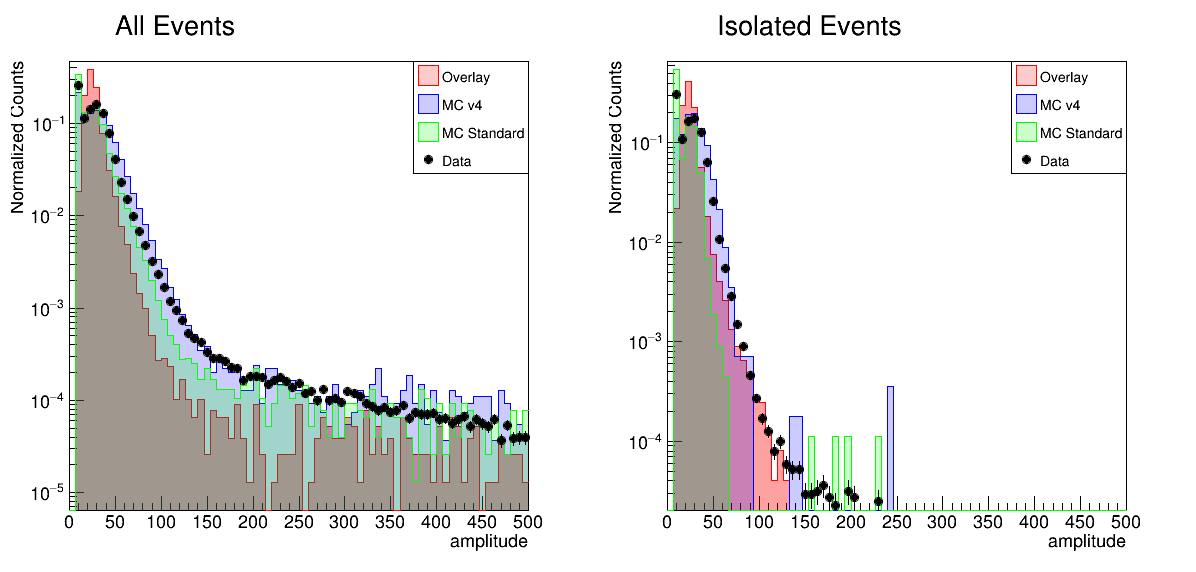

In [43]:
c_comb.Draw()

### Check waveforms to determine why the hit times are different

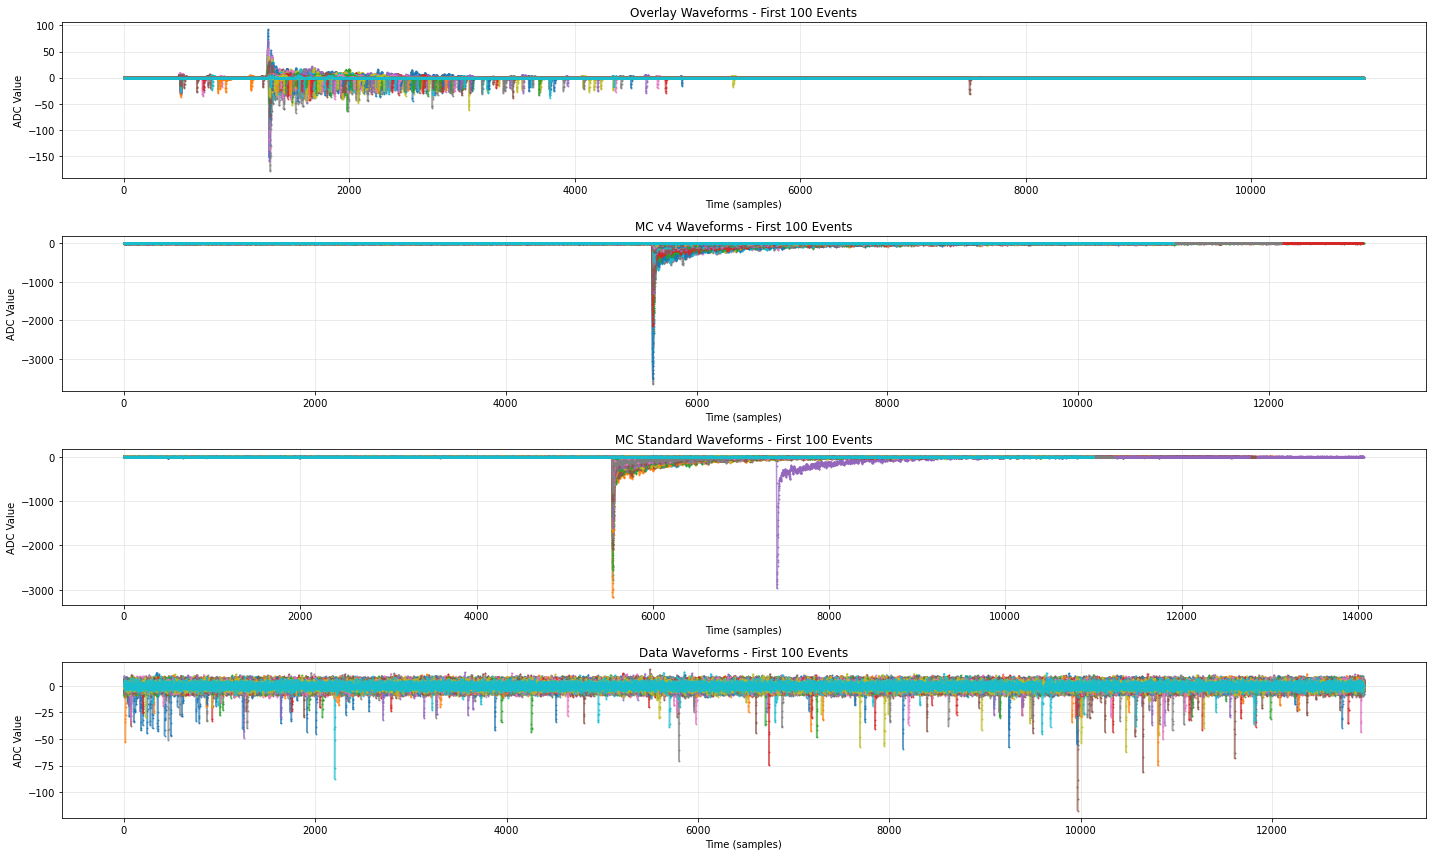

In [26]:
f_overlay = uproot.open("/nashome/m/micarrig/icarus/pmt/v10_06_00_01p04/overlay_isoTree.root")
t_overlay = f_overlay["mcana/mcwfs"]

f_mcv4 = uproot.open("/nashome/m/micarrig/icarus/pmt/v10_06_00_01p04/mcV4_isoTree.root")
t_mcv4 = f_mcv4["mcana/mcwfs"]

f_mc = uproot.open("/nashome/m/micarrig/icarus/pmt/v10_06_00_01p04/mcStandard_isoTree.root")
t_mc = f_mc["mcana/mcwfs"]

f_data = uproot.open("/nashome/m/micarrig/icarus/pmt/v10_06_00_01p04/data_isoTree.root")
t_data = f_data["mcana/mcwfs"]


nevents = 100

# Get waveform data from both files
wf_overlay = t_overlay['wf'].array(entry_start=0, entry_stop=nevents) 
wf_mcv4 = t_mcv4['wf'].array(entry_start=0, entry_stop=nevents)
wf_mc = t_mc['wf'].array(entry_start=0, entry_stop=nevents)
wf_data = t_data['wf'].array(entry_start=0, entry_stop=nevents)

base_overlay = t_overlay['baselines'].array(entry_start=0, entry_stop=nevents)
base_mcv4 = t_mcv4['baselines'].array(entry_start=0, entry_stop=nevents)
base_mc = t_mc['baselines'].array(entry_start=0, entry_stop=nevents)
base_data = t_data['baselines'].array(entry_start=0, entry_stop=nevents)

wfMod_overlay = wf_overlay - base_overlay
wfMod_mcv4 = wf_mcv4 - base_mcv4
wfMod_mc = wf_mc - base_mc  
wfMod_data = wf_data - base_data    

def plotWaveforms(data):
    for i, waveform in enumerate(data):
        plt.plot(waveform, marker='.', markersize=2, label=f'Event {i}', alpha=0.7)

plt.figure(figsize=(20, 12))

# Left subplot - Overlay data
plt.subplot(4, 1, 1)
plotWaveforms(wfMod_overlay)
plt.xlabel('Time (samples)')
plt.ylabel('ADC Value')
plt.title(f'Overlay Waveforms - First {nevents} Events')
#plt.legend()
plt.grid(True, alpha=0.3)

# Right subplot - MC v4 data
plt.subplot(4, 1, 2)
plotWaveforms(wfMod_mcv4)
plt.xlabel('Time (samples)')
plt.ylabel('ADC Value')
plt.title(f'MC v4 Waveforms - First {nevents} Events')
#plt.legend()
plt.grid(True, alpha=0.3)

# Right subplot - MC standard data
plt.subplot(4, 1, 3)
plotWaveforms(wfMod_mc)
plt.xlabel('Time (samples)')
plt.ylabel('ADC Value')
plt.title(f'MC Standard Waveforms - First {nevents} Events')
#plt.legend()
plt.grid(True, alpha=0.3)

# Right subplot - data
plt.subplot(4, 1, 4)
plotWaveforms(wfMod_data)
plt.xlabel('Time (samples)')
plt.ylabel('ADC Value')
plt.title(f'Data Waveforms - First {nevents} Events')
#plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

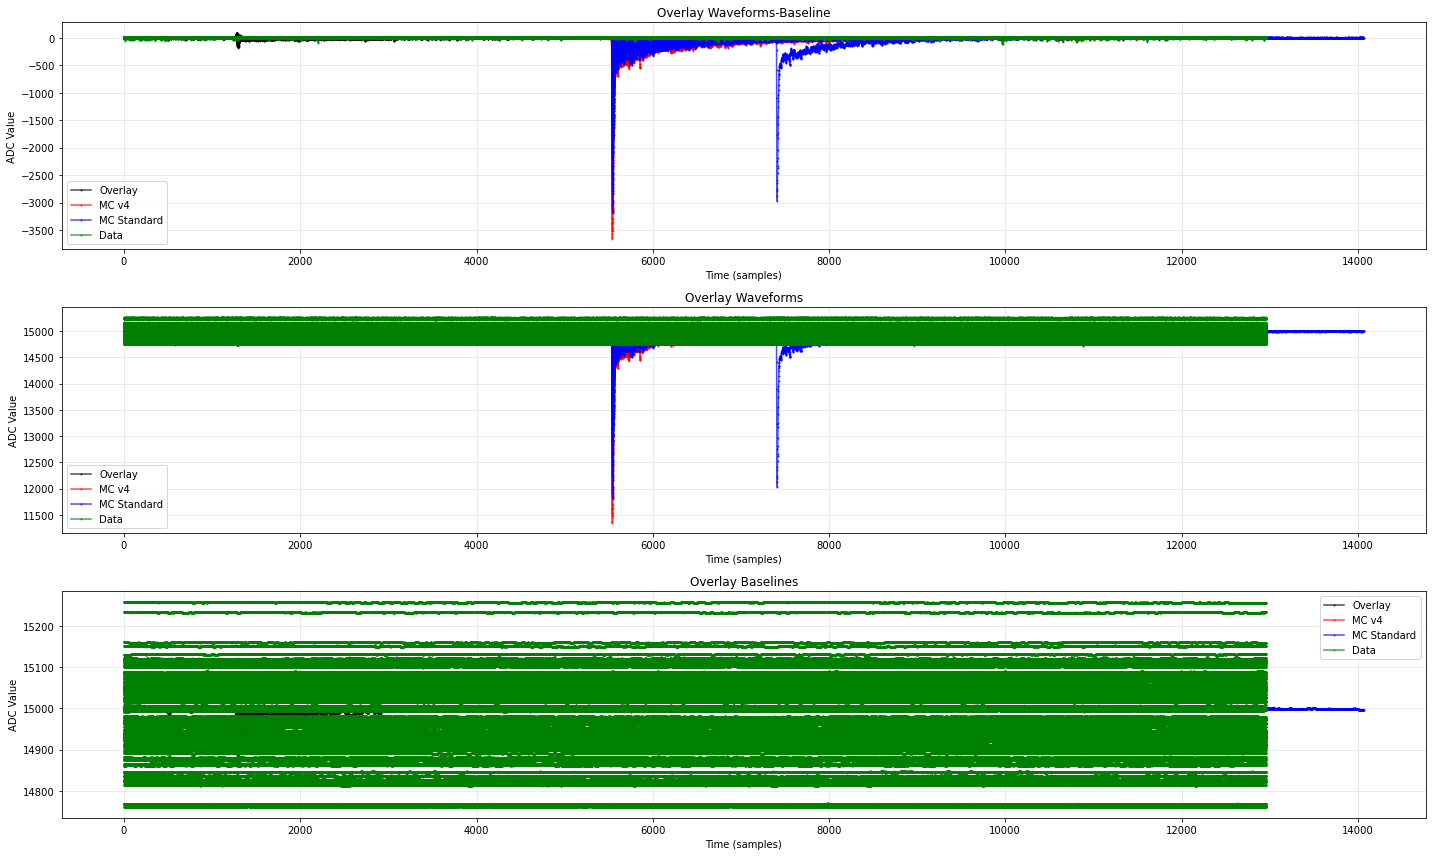

In [27]:
f_overlay = uproot.open("/nashome/m/micarrig/icarus/pmt/v10_06_00_01p04/overlay_isoTree.root")
t_overlay = f_overlay["mcana/mcwfs"]

f_mcv4 = uproot.open("/nashome/m/micarrig/icarus/pmt/v10_06_00_01p04/mcV4_isoTree.root")
t_mcv4 = f_mcv4["mcana/mcwfs"]

f_mc = uproot.open("/nashome/m/micarrig/icarus/pmt/v10_06_00_01p04/mcStandard_isoTree.root")
t_mc = f_mc["mcana/mcwfs"]

f_data = uproot.open("/nashome/m/micarrig/icarus/pmt/v10_06_00_01p04/data_isoTree.root")
t_data = f_data["mcana/mcwfs"]


# Get waveform data from both files
wf_overlay = t_overlay['wf'].array(entry_start=0, entry_stop=100) 
base_overlay = t_overlay['baselines'].array(entry_start=0, entry_stop=100) 

wf_mcv4 = t_mcv4['wf'].array(entry_start=0, entry_stop=100)
base_mcv4 = t_mcv4['baselines'].array(entry_start=0, entry_stop=100)
wf_mc = t_mc['wf'].array(entry_start=0, entry_stop=100)
base_mc = t_mc['baselines'].array(entry_start=0, entry_stop=100)
wf_data = t_data['wf'].array(entry_start=0, entry_stop=100)
base_data = t_data['baselines'].array(entry_start=0, entry_stop=100)

wfMod_overlay = wf_overlay - base_overlay
wfMod_mcv4 = wf_mcv4 - base_mcv4
wfMod_mc = wf_mc - base_mc
wfMod_data = wf_data - base_data


def plotWaveforms(data, color="black", label=None):
    for i, waveform in enumerate(data):
        if i==0:
            plt.plot(waveform, marker='.', markersize=2, label=label, alpha=0.7, color=color)
        else:
            plt.plot(waveform, marker='.', markersize=2, alpha=0.7, color=color)
            

plt.figure(figsize=(20, 12))

plt.subplot(3, 1, 1)
# Left subplot - Overlay data
plotWaveforms(wfMod_overlay, 'black', 'Overlay')
plt.xlabel('Time (samples)')
plt.ylabel('ADC Value')
plt.title('Overlay Waveforms-Baseline')
#plt.legend()
plt.grid(True, alpha=0.3)

# Right subplot - MC v4 data
plotWaveforms(wfMod_mcv4, 'red', 'MC v4')

# Right subplot - MC standard data
plotWaveforms(wfMod_mc, 'blue', 'MC Standard')

# Right subplot - data
plotWaveforms(wfMod_data, 'green', 'Data')
plt.legend()

# waveforms
plt.subplot(3, 1, 2)
# Left subplot - Overlay data
plotWaveforms(wf_overlay, 'black', 'Overlay')
plt.xlabel('Time (samples)')
plt.ylabel('ADC Value')
plt.title('Overlay Waveforms')
#plt.legend()
plt.grid(True, alpha=0.3)

# Right subplot - MC v4 data
plotWaveforms(wf_mcv4, 'red', 'MC v4')

# Right subplot - MC standard data
plotWaveforms(wf_mc, 'blue', 'MC Standard')

# Right subplot - data
plotWaveforms(wf_data, 'green', 'Data')
plt.legend()

#baselines
plt.subplot(3, 1, 3)
# Left subplot - Overlay data
plotWaveforms(base_overlay, 'black', 'Overlay')
plt.xlabel('Time (samples)')
plt.ylabel('ADC Value')
plt.title('Overlay Baselines')
#plt.legend()
plt.grid(True, alpha=0.3)

# Right subplot - MC v4 data
plotWaveforms(base_mcv4, 'red', 'MC v4')

# Right subplot - MC standard data
plotWaveforms(base_mc, 'blue', 'MC Standard')

# Right subplot - data
plotWaveforms(base_data, 'green', 'Data')
plt.legend()


plt.tight_layout()
plt.show()

### Compare Waveforms

In [95]:
ls /pnfs/icarus/scratch/users/icaruspro/poms_production/mc/2025A_ICARUS_Overlays_PMT_Validations/SimNoiseOff/v10_06_00_04p04/overlay/

ls: cannot access '/pnfs/icarus/scratch/users/icaruspro/poms_production/mc/2025A_ICARUS_Overlays_PMT_Validations/SimNoiseOff/v10_06_00_04p04/overlay/': No such file or directory


### Check Calibration Files

In [36]:
opHitE = uproot.open("root://fndcadoor.fnal.gov/pnfs/fnal.gov/usr/icarus/scratch/users/mvicenzi/jobOutput/prod_muon_throughCathode/Stage1var4fromG4/out/65988981_0/Supplemental-prod_muon_throughCathode_vol001_20250924T025527-SinglesGen_9a7cdbb8-3e8a-4131-87e9-4bf65550ec27_20250924T031830-G4_20250925T204132-DetSim_ddab1cf6-5433-4b60-a827-e90b0fb7cd70.root:simpleLightAna/opflashCryoE_ophittree")
opHitW = uproot.open("root://fndcadoor.fnal.gov/pnfs/fnal.gov/usr/icarus/scratch/users/mvicenzi/jobOutput/prod_muon_throughCathode/Stage1var4fromG4/out/65988981_0/Supplemental-prod_muon_throughCathode_vol001_20250924T025527-SinglesGen_9a7cdbb8-3e8a-4131-87e9-4bf65550ec27_20250924T031830-G4_20250925T204132-DetSim_ddab1cf6-5433-4b60-a827-e90b0fb7cd70.root:simpleLightAna/opflashCryoW_ophittree")
opHitOther = uproot.open("root://fndcadoor.fnal.gov/pnfs/fnal.gov/usr/icarus/scratch/users/mvicenzi/jobOutput/prod_muon_throughCathode/Stage1var4fromG4/out/65988981_0/Supplemental-prod_muon_throughCathode_vol001_20250924T025527-SinglesGen_9a7cdbb8-3e8a-4131-87e9-4bf65550ec27_20250924T031830-G4_20250925T204132-DetSim_ddab1cf6-5433-4b60-a827-e90b0fb7cd70.root:simpleLightAna/ophit_ttree")

In [74]:

variables_to_plot = [
    Variable(name='rise_time', bins=50, range=(0, 0.05)),
    Variable(name='integral', bins=50, range=(0, 500)),
    Variable(name='amplitude', bins=75, range=(0, 500)),
    Variable(name='start_time', bins=40, range=(0, 40)),
    Variable(name='peak_time', bins=40, range=(0, 40)),
    Variable(name='width', bins=100, range=(0, 0.2)),
    Variable(name='pe', bins=100, range=(0, 50)),
    Variable(name='channel_id', bins=500, range=(0, 500)),
    Variable(name='abs_start_time', bins=100, range=(0, 2000)),
    #Variable(name='start_time_rwm', bins=100, range=(0, 100)),
    #Variable(name='peak_time_rwm', bins=100, range=(0, 100)),
    #Variable(name='fast_to_total', bins=100, range=(0, 100)),
]
step_size = '10 MB'

all_vars = [var.name for var in variables_to_plot]
all_vars.append('amplitude')  # For selection
all_vars = list(set(all_vars))

print("variables", all_vars)

f_v4 = 'root://fndcadoor.fnal.gov/pnfs/fnal.gov/usr/icarus/scratch/users/mvicenzi/jobOutput/prod_muon_throughCathode/Stage1var4fromG4/out/65988981_0/Supplemental-prod_muon_throughCathode_vol001_20250924T025527-SinglesGen_9a7cdbb8-3e8a-4131-87e9-4bf65550ec27_20250924T031830-G4_20250925T204132-DetSim_ddab1cf6-5433-4b60-a827-e90b0fb7cd70.root'
f_standard = 'root://fndcadoor.fnal.gov:1094/pnfs/fnal.gov/usr/icarus/scratch/users/mvicenzi/jobOutput/prod_muon_throughCathode/Stage1fromG4/out/80377486_0/Supplemental-prod_muon_throughCathode_vol001_20250924T025527-SinglesGen_9a7cdbb8-3e8a-4131-87e9-4bf65550ec27_20250924T031830-G4_20250924T152624-DetSim_6b3a8eb1-ccd9-4905-a42d-befbd50aa0d9.root'

datasets = {
    'FM-East V4': uproot.iterate(f"{f_v4}:simpleLightAna/opflashCryoE_ophittree", 
                           all_vars, step_size=step_size),
    'FM-West V4': uproot.iterate(f"{f_v4}:simpleLightAna/opflashCryoW_ophittree",
                           all_vars, step_size=step_size),
    'Non-FM V4': uproot.iterate(f"{f_v4}:simpleLightAna/ophit_ttree",
                           all_vars, step_size=step_size),
    'FM-East Standard': uproot.iterate(f"{f_standard}:simpleLightAna/opflashCryoE_ophittree", 
                           all_vars, step_size=step_size),
    'FM-West Standard': uproot.iterate(f"{f_standard}:simpleLightAna/opflashCryoW_ophittree",
                           all_vars, step_size=step_size),
    'Non-FM Standard': uproot.iterate(f"{f_standard}:simpleLightAna/ophit_ttree",
                           all_vars, step_size=step_size),
}
hists = {}

for label, data in datasets.items():
    
    hists[label] = [r.TH1F(f"h_{label}_{var.name}", f"{label} {var.name} distribution", var.bins, var.range[0], var.range[1]) for var in variables_to_plot]

    for batch in data:

        for ivar, var in enumerate(variables_to_plot):

            sel = batch["amplitude"] > -500
            #sel = batch["timeIsolated"] == True

            # Flatten and convert to NumPy
            t = ak.type(batch[var.name])
            if "var *" in str(t) or "N *" in str(t):
                data_array = ak.flatten(batch[var.name][sel])
            else: 
                data_array = batch[var.name][sel]
            data_array = ak.to_numpy(data_array)
            
            # Count underflow and overflow
            #underflow = np.sum(data_array < var.range[0])
            #overflow = np.sum(data_array > var.range[1])

            hists[label][ivar].FillN(len(data_array), arr.array('d', data_array), np.ones(len(data_array)))



variables ['integral', 'width', 'amplitude', 'rise_time', 'channel_id', 'peak_time', 'start_time', 'pe', 'abs_start_time']


In [77]:
c1 = r.TCanvas("c1", "c1", 800, 600)

r.gStyle.SetCanvasPreferGL(r.kTRUE)

normalize = True
logy = True

colors = [r.kRed, r.kBlue, r.kGreen, r.kRed, r.kBlue, r.kGreen]
linestyles = [1, 1, 1, 2, 2, 2]

fout = r.TFile("/nashome/m/micarrig/icarus/pmt/v10_06_00_01p04/plotCalibrations.root", "RECREATE")

first_key = list(hists.keys())[0]
for i in range(len(hists[first_key])):
    c1.Clear()

    maxY = 0
    l = r.TLegend(0.7, 0.7, 0.9, 0.9)
    for j, (label, hist_list) in enumerate(hists.items()):
        print("Processing ", label, " for variable ", variables_to_plot[i].name)
        #hist_list[i].SetFillColorAlpha(colors[j], 0.2)
        hist_list[i].SetLineColor(colors[j])
        hist_list[i].SetLineStyle(linestyles[j])
        hist_list[i].Sumw2()
        if hist_list[i].Integral() > 0 and normalize:
            hist_list[i].Scale(1/hist_list[i].Integral())
        if hist_list[i].GetMaximum() > maxY:
            maxY = hist_list[i].GetMaximum()

    for j, (label, hist_list) in enumerate(hists.items()):
        if j == 0:
            hist_list[i].SetMaximum(maxY * 1.2)
            hist_list[i].SetTitle(f"Comparison of {variables_to_plot[i].name} Distributions")
            hist_list[i].GetXaxis().SetTitle(variables_to_plot[i].name)
            hist_list[i].GetYaxis().SetTitle("Normalized Counts")
            r.gStyle.SetOptStat(0)
            hist_list[i].Draw("hist")
        hist_list[i].Draw("hist same f")
        l.AddEntry(hist_list[i], label, "l")

    c1.Update()
    l.Draw()
    c1.SetLogy(logy)
    fout.cd()
    c1.Write(f'c_{variables_to_plot[i].name}')
    c1.SaveAs(f'/nashome/m/micarrig/icarus/pmt/v10_06_00_01p04/outputPlots/calibration/c_{variables_to_plot[i].name}.png')

fout.Close()




Processing  FM-East V4  for variable  rise_time
Processing  FM-West V4  for variable  rise_time
Processing  Non-FM V4  for variable  rise_time
Processing  FM-East Standard  for variable  rise_time
Processing  FM-West Standard  for variable  rise_time
Processing  Non-FM Standard  for variable  rise_time
Processing  FM-East V4  for variable  integral
Processing  FM-West V4  for variable  integral
Processing  Non-FM V4  for variable  integral
Processing  FM-East Standard  for variable  integral
Processing  FM-West Standard  for variable  integral
Processing  Non-FM Standard  for variable  integral
Processing  FM-East V4  for variable  amplitude
Processing  FM-West V4  for variable  amplitude
Processing  Non-FM V4  for variable  amplitude
Processing  FM-East Standard  for variable  amplitude
Processing  FM-West Standard  for variable  amplitude
Processing  Non-FM Standard  for variable  amplitude
Processing  FM-East V4  for variable  start_time
Processing  FM-West V4  for variable  start_t

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Info in <TCanvas::Print>: png file /nashome/m/micarrig/icarus/pmt/v10_06_00_01p04/outputPlots/calibration/c_rise_time.png has been created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in 

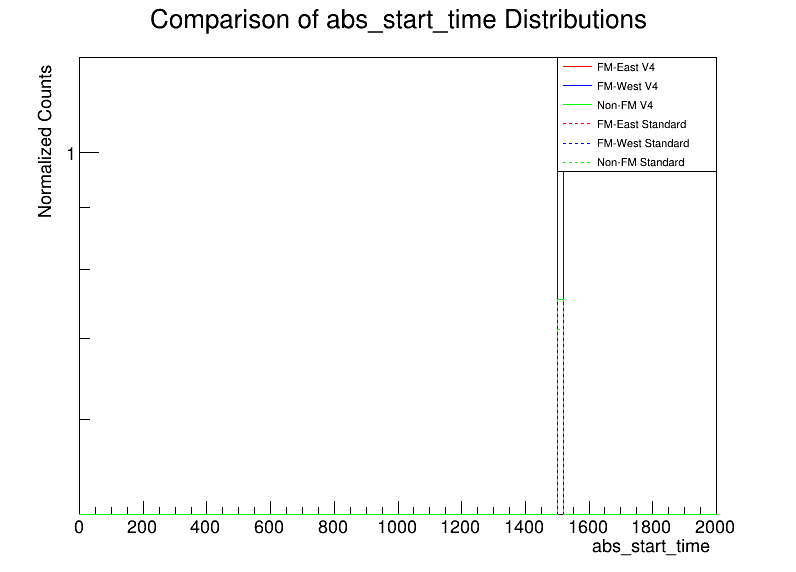

In [ ]:
fc = r.TFile.Open("/nashome/m/micarrig/icarus/pmt/v10_06_00_01p04/plotCalibrations.root", "READ")
c.Get

### Check the sPE as a function of run

In [22]:
cal = pd.read_csv("/exp/icarus/data/users/mvicenzi/pmt-calibration/calibrationdb/backgroundphotons_run9342_1672516694.csv")

cal

pmt  nentries        mu       emu         q        eq     sigma  \
0      0      9052  0.027362  0.004620  0.455474  0.002040  0.151892   
1      1     13704  0.032467  0.003964  0.465236  0.001780  0.169094   
2      2     13552  0.097318  0.006583  0.473270  0.001846  0.163371   
3      3     15024  0.047112  0.004289  0.454197  0.001645  0.161106   
4      4     14123  0.099044  0.006611  0.461177  0.001964  0.171422   
..   ...       ...       ...       ...       ...       ...       ...   
355   79     17662  0.045716  0.003565  0.322141  0.001073  0.110940   
356   91     34434  0.251590  0.008866  0.382644  0.001568  0.170931   
357  117     42302  0.223149  0.007802  0.355776  0.001742  0.173130   
358  269     15225  0.021269  0.003082  0.462393  0.001721  0.166925   
359  279     10323  0.041864  0.008523  0.237396  0.002829  0.120236   

       esigma    amplitude   eamplitude         chi2  ndf  fitstatus  
0    0.001898  3436.697510   574.592529   171.008682  123          0  
1    0.001678  4421.188965   533.344177   178.010742  129          0  
2    0.001790  1470.357178    95.704330   234.061157  150          0  
3    0.001520  3329.819336   297.945740   197.484924  138          0  
4    0.001933  1532.376099    98.572517   261.351776  165          0  
..        ...          ...          ...          ...  ...        ...  
355  0.001096  4144.462402   319.013153   282.530884  110          0  
356  0.001621  1637.936890    51.507534  1041.574341  290          0  
357  0.001659  2428.786377    78.211479  1221.999146  289          0  
358  0.001579  7604.520996  1094.255859   203.010635  129          0  
359  0.002220  2975.010498   604.501648   419.180298   90          0  

[360 rows x 13 columns]

In [23]:
#convert q from electrons to adc * tick

# clock tick = 2ns
# resistance = 50 ohm
# 1 ADC * tick = 0.00488 pC
# electron charge = 1.602e-19 C

def calculate_qADC(cal):
    cal['qADC'] = cal['q'] * 1e7 * 1.602e-19 / (0.00488e-12)

calculate_qADC(cal)
cal

pmt  nentries        mu       emu         q        eq     sigma  \
0      0      9052  0.027362  0.004620  0.455474  0.002040  0.151892   
1      1     13704  0.032467  0.003964  0.465236  0.001780  0.169094   
2      2     13552  0.097318  0.006583  0.473270  0.001846  0.163371   
3      3     15024  0.047112  0.004289  0.454197  0.001645  0.161106   
4      4     14123  0.099044  0.006611  0.461177  0.001964  0.171422   
..   ...       ...       ...       ...       ...       ...       ...   
355   79     17662  0.045716  0.003565  0.322141  0.001073  0.110940   
356   91     34434  0.251590  0.008866  0.382644  0.001568  0.170931   
357  117     42302  0.223149  0.007802  0.355776  0.001742  0.173130   
358  269     15225  0.021269  0.003082  0.462393  0.001721  0.166925   
359  279     10323  0.041864  0.008523  0.237396  0.002829  0.120236   

       esigma    amplitude   eamplitude         chi2  ndf  fitstatus  \
0    0.001898  3436.697510   574.592529   171.008682  123          0   
1    0.001678  4421.188965   533.344177   178.010742  129          0   
2    0.001790  1470.357178    95.704330   234.061157  150          0   
3    0.001520  3329.819336   297.945740   197.484924  138          0   
4    0.001933  1532.376099    98.572517   261.351776  165          0   
..        ...          ...          ...          ...  ...        ...   
355  0.001096  4144.462402   319.013153   282.530884  110          0   
356  0.001621  1637.936890    51.507534  1041.574341  290          0   
357  0.001659  2428.786377    78.211479  1221.999146  289          0   
358  0.001579  7604.520996  1094.255859   203.010635  129          0   
359  0.002220  2975.010498   604.501648   419.180298   90          0   

           qADC  
0    149.522407  
1    152.727064  
2    155.364455  
3    149.103195  
4    151.394581  
..          ...  
355  105.752025  
356  125.613870  
357  116.793679  
358  151.793768  
359   77.932048  

[360 rows x 14 columns]

In [63]:
def makeWaveform2(mu, q, sigma, a, n_samples=500):
    #q = q*10000000
    print("Generating waveform with mu =", mu, " q =", q, " sigma =", sigma, " amplitude =", a)
    t = np.linspace(0, 19, n_samples)
    waveform = np.zeros_like(t, dtype=float)
    arrival_time = np.random.uniform(0, t[-1])
    pulse_times = t - arrival_time

    for i in range(1, 5):
        pois = mu**i * np.exp(-mu) / np.math.factorial(i)
        gaus = a / np.sqrt(2 * np.pi * sigma**2 * i) * np.exp(-0.5 * ((pulse_times - i * q)**2 / (sigma**2 * i)))
        waveform += pois * gaus

    # Calculate the area under the waveform using trapezoidal integration
    area = np.trapz(waveform, t)
    print("Waveform area:", area)

    return t, waveform

Generating waveform with mu = 0.027362  q = 0.455474  sigma = 0.151892  amplitude = 3436.69751
Waveform area: 92.7600789712506


(0.0, 19.0)

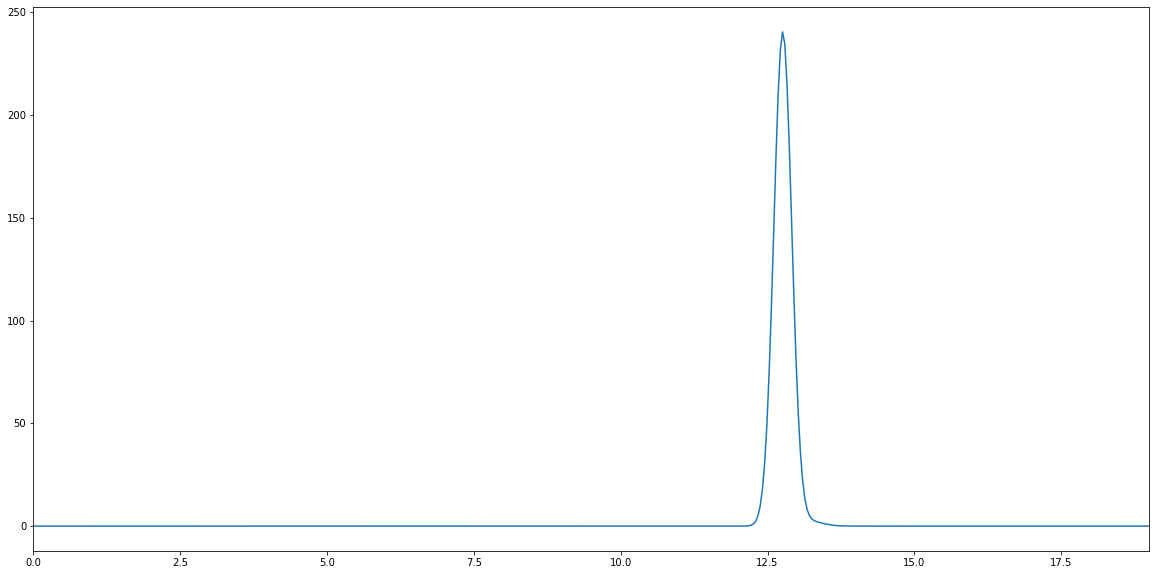

In [64]:
plt.figure(figsize=(20, 10))
t, h = makeWaveform2(cal['mu'][0], cal['q'][0], cal['sigma'][0], cal['amplitude'][0])
plt.plot(t, h)
plt.xlim(0, 19)



In [25]:
#check calibration data from Icaruspro_2025_wcdnn_production_Reproc_Run2_SBN_v10_06_00_01p05_bnbmajority_calibtuples

fData = uproot.open("root://fndcadoor.fnal.gov://sbn/data/sbn_fd/poms_production/data/Reproc_Run2_SBN/reconstructed/icaruscode_v10_06_00_01p05/bnbmajority/calibtuples/ea/e8/hist_compressed_data_dl4_fstrmBNBMAJORITY_run9342_14_20250709T164332_bnb_20250709T171015_stage1_caf_larcv-6aae1582-5332-4aed-baa5-dfcb1e8b0e58.root:simpleLightAna/opflashCryoE_ophittree")
fData.keys()

['run',
 'event',
 'timestamp',
 'flash_id',
 'channel_id',
 'integral',
 'amplitude',
 'start_time',
 'peak_time',
 'rise_time',
 'abs_start_time',
 'start_time_rwm',
 'peak_time_rwm',
 'pe',
 'width',
 'fast_to_total']

In [5]:
runs = fData['run'].array()
runs

<Array [9342, 9342, 9342, ... 9342, 9342, 9342] type='128829 * int32'>

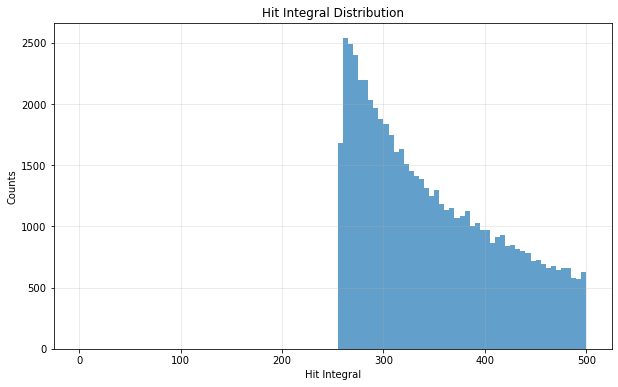

In [6]:
hInt = fData["integral"].array()
plt.figure(figsize=(10, 6))
plt.hist(ak.to_numpy(hInt), bins=100, range=(0, 500), histtype='stepfilled', alpha=0.7)
plt.xlabel('Hit Integral')
plt.ylabel('Counts')
plt.title('Hit Integral Distribution')
plt.grid(True, alpha=0.3)
plt.show()

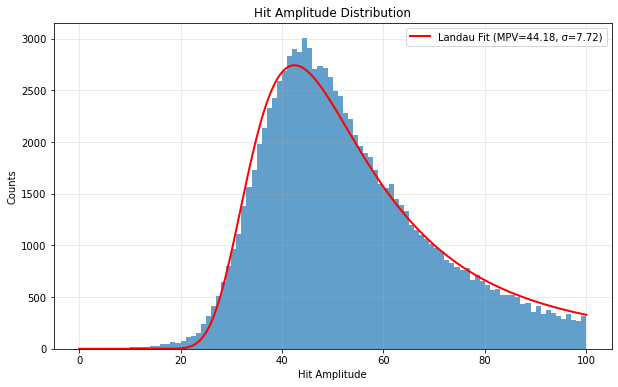

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


In [7]:
hInt = fData["amplitude"].array()

plt.figure(figsize=(10, 6))
plt.hist(ak.to_numpy(hInt), bins=100, range=(0, 100), histtype='stepfilled', alpha=0.7)
plt.xlabel('Hit Amplitude')

# Fit with Landau distribution using ROOT
h_landau = r.TH1F("h_landau", "Amplitude Distribution", 100, 0, 100)
data_array = ak.to_numpy(hInt)
h_landau.FillN(len(data_array), arr.array('d', data_array), np.ones(len(data_array)))

# Create Landau function
landau_func = r.TF1("landau_fit", "landau", 0, 100)
h_landau.Fit(landau_func, "Q")

# Get fit parameters
mpv = landau_func.GetParameter(1)  # Most Probable Value
sigma = landau_func.GetParameter(2)  # Width parameter

# Plot the fit on matplotlib
x_fit = np.linspace(0, 100, 1000)
y_fit = [landau_func.Eval(x) for x in x_fit]
plt.plot(x_fit, y_fit, 'r-', linewidth=2, label=f'Landau Fit (MPV={mpv:.2f}, σ={sigma:.2f})')
plt.legend()
plt.ylabel('Counts')
plt.title('Hit Amplitude Distribution')
plt.grid(True, alpha=0.3)
plt.show()

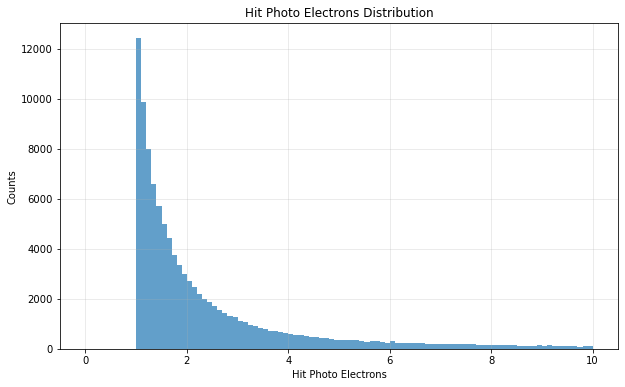

In [8]:
hInt = fData["pe"].array()

plt.figure(figsize=(10, 6))
plt.hist(ak.to_numpy(hInt), bins=100, range=(0, 10), histtype='stepfilled', alpha=0.7)
plt.xlabel('Hit Photo Electrons')
plt.ylabel('Counts')
plt.title('Hit Photo Electrons Distribution')
plt.grid(True, alpha=0.3)
plt.show()

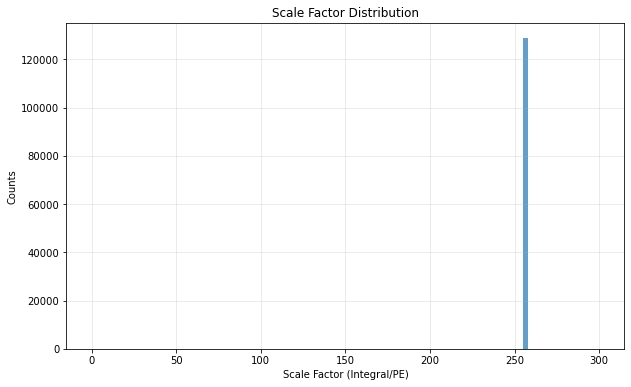

<Array [257, 257, 257, 257, ... 257, 257, 257] type='128829 * float32'>

In [9]:
v_pe = fData["pe"].array()
v_integral = fData["integral"].array()
v_conv = v_integral / v_pe


plt.figure(figsize=(10, 6))
plt.hist(ak.to_numpy(v_conv), bins=100, range=(0, 300), histtype='stepfilled', alpha=0.7)
plt.xlabel('Scale Factor (Integral/PE)')
plt.ylabel('Counts')
plt.title('Scale Factor Distribution')
plt.grid(True, alpha=0.3)
plt.show()

v_conv

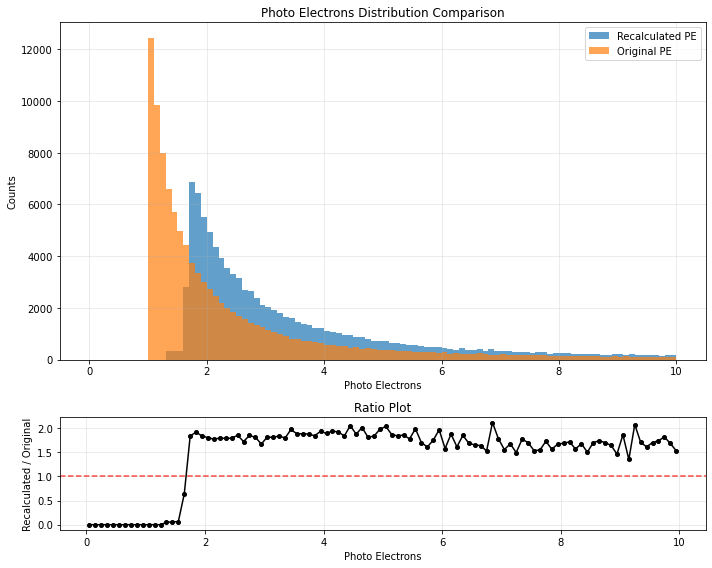

In [26]:
v_chan = fData['channel_id'].array()
v_cal = cal['qADC'][v_chan]
peRecal = v_integral / v_cal

# Create ratio plot
plt.figure(figsize=(10, 8))

gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])

# Main plot
plt.subplot(gs[0])
plt.hist(ak.to_numpy(peRecal), bins=100, range=(0, 10), histtype='stepfilled', alpha=0.7, label='Recalculated PE')
plt.hist(ak.to_numpy(v_pe), bins=100, range=(0, 10), histtype='stepfilled', alpha=0.7, label='Original PE')
plt.xlabel('Photo Electrons')
plt.ylabel('Counts')
plt.title('Photo Electrons Distribution Comparison')
plt.grid(True, alpha=0.3)
plt.legend()

# Ratio plot
plt.subplot(gs[1])
counts_recal, bins = np.histogram(ak.to_numpy(peRecal), bins=100, range=(0, 10))
counts_orig, _ = np.histogram(ak.to_numpy(v_pe), bins=100, range=(0, 10))

# Calculate ratio (avoid division by zero)
ratio = np.divide(counts_recal, counts_orig, out=np.zeros_like(counts_recal, dtype=float), where=(counts_orig != 0))

bin_centers = (bins[:-1] + bins[1:]) / 2
plt.plot(bin_centers, ratio, 'ko-', markersize=4)
plt.axhline(y=1, color='r', linestyle='--', alpha=0.7)
plt.xlabel('Photo Electrons')
plt.ylabel('Recalculated / Original')
plt.title('Ratio Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Original PE mean: 2.348866399495677 and stddev: 1.6795687977459188
Recalculated PE mean: 3.5570573605079305 and stddev: 1.9115279611582072
Landau fit failed: Optimal parameters not found: Number of calls to function has reached maxfev = 800.


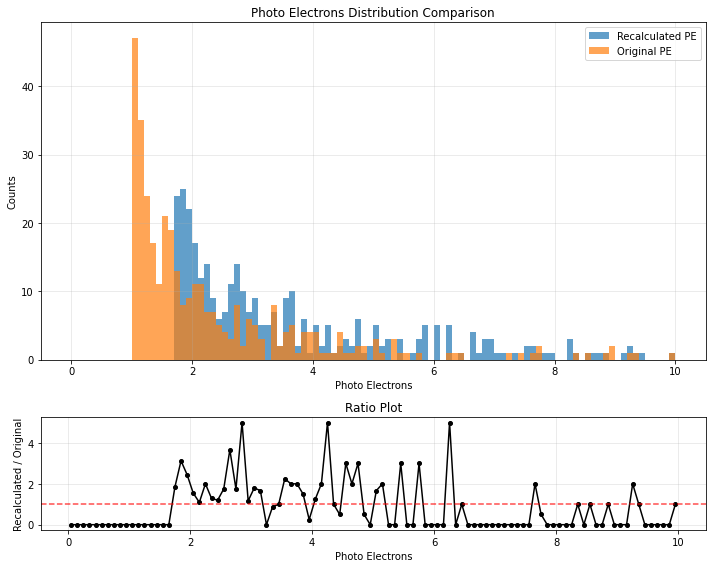

In [ ]:
v_chan = fData['channel_id'].array()
cut = ak.where(v_chan == 1)
v_cal = cal['qADC'][0]
peRecal = v_integral[cut] / v_cal
peOrig = v_pe[cut]

peRecal = peRecal[peRecal < 10]
peOrig = peOrig[peOrig < 10]

print("Original PE mean:", ak.mean(peOrig), "and stddev:", ak.std(peOrig))
print("Recalculated PE mean:", ak.mean(peRecal), "and stddev:", ak.std(peRecal))

# Create ratio plot
plt.figure(figsize=(10, 8))

gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])

# Main plot
plt.subplot(gs[0])
plt.hist(ak.to_numpy(peRecal), bins=100, range=(0, 10), histtype='stepfilled', alpha=0.7, label='Recalculated PE')
plt.hist(ak.to_numpy(peOrig), bins=100, range=(0, 10), histtype='stepfilled', alpha=0.7, label='Original PE')
plt.xlabel('Photo Electrons')
plt.ylabel('Counts')
plt.title('Photo Electrons Distribution Comparison')
plt.grid(True, alpha=0.3)
plt.legend()

# Ratio plot
plt.subplot(gs[1])
counts_recal, bins = np.histogram(ak.to_numpy(peRecal), bins=100, range=(0, 10))
counts_orig, _ = np.histogram(ak.to_numpy(peOrig), bins=100, range=(0, 10))

# Calculate ratio (avoid division by zero)
ratio = np.divide(counts_recal, counts_orig, out=np.zeros_like(counts_recal, dtype=float), where=(counts_orig != 0))

bin_centers = (bins[:-1] + bins[1:]) / 2
plt.plot(bin_centers, ratio, 'ko-', markersize=4)
plt.axhline(y=1, color='r', linestyle='--', alpha=0.7)
plt.xlabel('Photo Electrons')
plt.ylabel('Recalculated / Original')
plt.title('Ratio Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Original:
	 Numpy PE mean: 2.348866399495677 and stddev: 1.6795687977459188 
	 Landau MPV: 1.3617992109155344  and sigma: 0.24110550373872744
Recalculated:
	 Numpy PE mean: 3.5570573605079305 and stddev: 1.9115279611582072 
	 Landau MPV: 2.3218102799808653  and sigma: 0.40483262814443477
35.244283201091264
 FCN=94.6842 FROM HESSE     STATUS=OK             16 CALLS         536 TOTAL
                     EDM=2.49341e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.48439e+02   1.36631e+01   1.07276e-02  -2.76459e-05
   2  MPV          1.36180e+00   2.97956e-02   2.99468e-05  -1.46076e-02
   3  Sigma        2.41106e-01   1.86654e-02   1.30021e-05   1.56082e-02
                               ERR DEF= 0.5
 FCN=96.4055 FROM HESSE     STATUS=OK             16 CALLS         678 TOTAL
                     EDM=3.19597e-08    STRATEGY= 1

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: h_orig (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_recal (Potential memory leak).


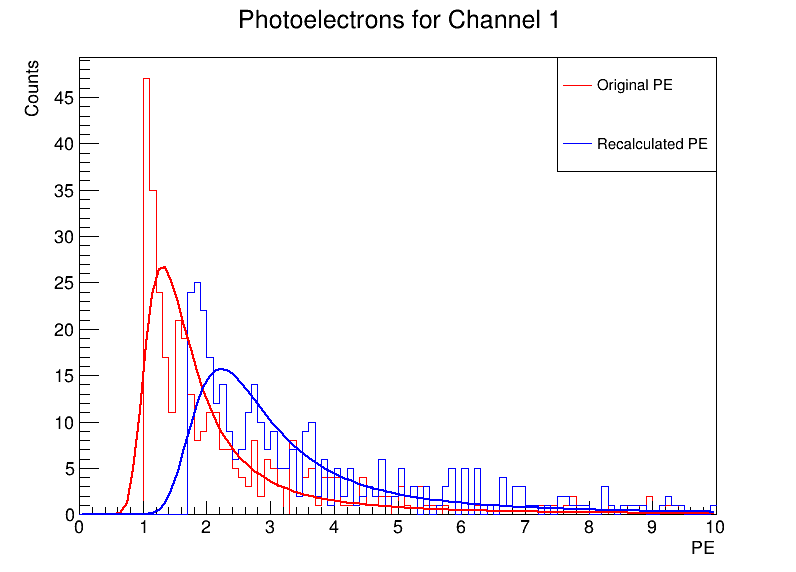

In [ ]:
r.gStyle.SetOptStat(0)

ichan = 1
v_chan = fData['channel_id'].array()
cut = ak.where(v_chan == ichan)
v_cal = cal['qADC'][0]
peRecal = v_integral[cut] / v_cal
peOrig = v_pe[cut]

c1 = r.TCanvas("c1", "c1", 800, 600)

h_orig = r.TH1F("h_orig", "Original PE", 100, 0, 10)
h_recal = r.TH1F("h_recal", "Recalculated PE", 100, 0, 10)

f_orig = r.TF1("f_orig", "[0]*TMath::Poisson(x, [1])", 0, 10)
f_recal = r.TF1("f_recal", "[0]*TMath::Poisson(x, [1])", 0, 10)
f_orig = r.TF1("f_orig", "landau", 0, 10)
f_recal = r.TF1("f_recal", "landau", 0, 10)

f_orig.SetParameters(1, 2, 1)
f_recal.SetParameters(1, 2, 1)

f_orig.SetLineColor(r.kRed)
f_recal.SetLineColor(r.kBlue)

h_orig.FillN(len(ak.to_numpy(peOrig)), arr.array('d', ak.to_numpy(peOrig)), np.ones(len(ak.to_numpy(peOrig))))
h_recal.FillN(len(ak.to_numpy(peRecal)), arr.array('d', ak.to_numpy(peRecal)), np.ones(len(ak.to_numpy(peRecal))))

h_orig.Fit(f_orig, "LMNB")
h_recal.Fit(f_recal, "LMNB")

l1 = r.TLegend(0.7, 0.7, 0.9, 0.9)
h_orig.SetLineColor(r.kRed)
h_orig.SetTitle(f'Photoelectrons for Channel {ichan}; PE; Counts')
h_recal.SetLineColor(r.kBlue)
h_orig.Draw()
h_recal.Draw("same")
f_orig.Draw("same")
f_recal.Draw("same")
l1.AddEntry(h_orig, "Original PE", "l")
l1.AddEntry(h_recal, "Recalculated PE", "l")
l1.Draw()

print("Original:\n\t Numpy PE mean:", ak.mean(peOrig[peOrig<10]), "and stddev:", ak.std(peOrig[peOrig<10]), "\n\t Landau MPV:", f_orig.GetParameter(1), " and sigma:", f_orig.GetParameter(2))
print("Recalculated:\n\t Numpy PE mean:", ak.mean(peRecal[peRecal<10]), "and stddev:", ak.std(peRecal[peRecal<10]), "\n\t Landau MPV:", f_recal.GetParameter(1), " and sigma:", f_recal.GetParameter(2))
c1.Draw()


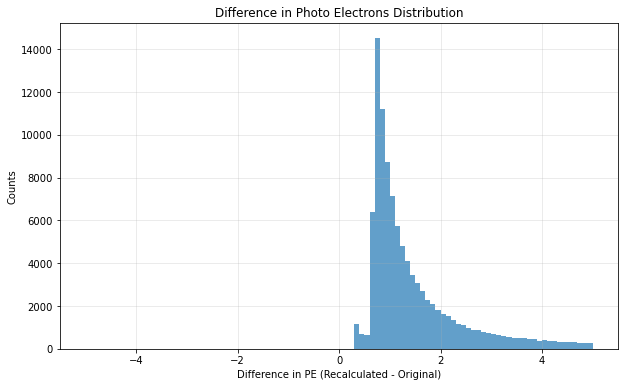

In [72]:
diff = peRecal - v_pe
plt.figure(figsize=(10, 6))
plt.hist(ak.to_numpy(diff), bins=100, range=(-5, 5), histtype='stepfilled', alpha=0.7)
plt.xlabel('Difference in PE (Recalculated - Original)')
plt.ylabel('Counts')
plt.title('Difference in Photo Electrons Distribution')
plt.grid(True, alpha=0.3)
plt.show()

In [73]:
#make 2d plot with channel on x and difference on y

plt.figure(figsize=(12, 8))
plt.hist2d(ak.to_numpy(v_chan), ak.to_numpy(diff), bins=[400, 60], range=[[0, 400], [-1, 2]], cmap='viridis', norm=matplotlib.colors.LogNorm())
plt.colorbar(label='Counts')
plt.xlabel('Channel ID')
plt.ylabel('Difference in PE (Recalculated - Original)')
plt.title('2D Histogram of Channel ID vs Difference in Photo Electrons')
plt.grid(True, alpha=0.3)
plt.show()

NameError: name 'matplotlib' is not defined

<Figure size 864x576 with 0 Axes>

In [ ]:
calRuns = []
speRuns = []

with open('/nashome/m/micarrig/icarus/pmt/v10_06_00_01p04/calFiles.txt', 'r') as f:
    for line in f:
        calRuns.append(line.strip().split('_')[5])

with open('/nashome/m/micarrig/icarus/pmt/v10_06_00_01p04/speFiles.txt', 'r') as f:
    for line in f:
        speRuns.append(line.strip().split('_')[1])

# Find intersection between speRuns and calRuns
intersection = list(set(speRuns) & set(calRuns))
print(f"Number of runs in speRuns: {len(speRuns)}")
print(f"Number of runs in calRuns: {len(calRuns)}")
print(f"Number of runs in intersection: {len(intersection)}")
print(f"Intersection: {sorted(intersection)}")


Number of runs in speRuns: 122
Number of runs in calRuns: 35957
Number of runs in intersection: 7
Intersection: ['run10097', 'run9342', 'run9383', 'run9384', 'run9448', 'run9745', 'run9746']


In [16]:
# check the gain as a function of the run number

calDir = '/exp/icarus/data/users/mvicenzi/pmt-calibration/calibrationdb/'

sPEs = {}
chi2 = {}
ndof = {}
fitStatus = {}
q = {}
eq = {}

#cal['qADC'] = cal['q'] * 1e7 * 1.602e-19 / (0.00488e-12)

for ifile, file in enumerate(os.listdir(calDir)):
    #if ifile > 1: break
    runNumber = int(file.split('_')[1].replace('run', ''))
    if runNumber > 11000: continue
    if runNumber < 9300: continue
    if not file.endswith('.csv'): continue
    cal = pd.read_csv(calDir + file)
    calculate_qADC(cal)
    sPEs[runNumber] = cal['qADC'].tolist()
    chi2[runNumber] = cal['chi2'].tolist()
    ndof[runNumber] = cal['ndf'].tolist()
    fitStatus[runNumber] = cal['fitstatus'].tolist()
    q[runNumber] = cal['q'].tolist()
    eq[runNumber] = cal['eq'].tolist()

# Sort sPEs by run number (key)
sorted_runs = sorted(sPEs.keys())

In [17]:
cal

pmt  nentries        mu       emu         q        eq     sigma  \
0      0      9668  0.023803  0.004180  0.425873  0.001844  0.145393   
1      1     10582  0.040372  0.005064  0.442056  0.002004  0.162041   
2      2     11000  0.089535  0.007322  0.435626  0.002034  0.159201   
3      3     11182  0.046951  0.005083  0.424768  0.001841  0.152457   
4      4     10829  0.098116  0.007420  0.438144  0.002078  0.159751   
..   ...       ...       ...       ...       ...       ...       ...   
355  355     13181  0.010994  0.004264  0.535179  0.002055  0.195443   
356  356     16989  0.026822  0.003734  0.528334  0.001861  0.200760   
357  357     15104  0.025488  0.004034  0.538504  0.002032  0.205543   
358  358     13584  0.008690  0.006044  0.562222  0.002222  0.213773   
359  359     12820  0.008950  0.006103  0.524292  0.002095  0.194757   

       esigma     amplitude    eamplitude        chi2  ndf  fitstatus  \
0    0.001616   4234.760742    737.202820  153.715881  119          0   
1    0.001896   2775.680664    343.111481  161.803864  126          0   
2    0.002106   1317.020630    104.157555  217.111389  139          0   
3    0.001717   2520.310059    268.239288  178.820038  126          0   
4    0.002098   1192.316406     86.952385  203.132645  146          0   
..        ...           ...           ...         ...  ...        ...   
355  0.001735  12031.916016   4601.143066  281.735291  151          0   
356  0.001662   6444.818359    887.021667  283.454071  153          0   
357  0.001830   6060.920898    948.575989  222.518066  148          0   
358  0.002106  15814.179688  10506.465820  213.069046  147          0   
359  0.001895  14458.766602   9502.090820  222.641327  140          0   

           qADC  
0    139.805030  
1    145.117564  
2    143.006732  
3    139.442282  
4    143.833338  
..          ...  
355  175.687860  
356  173.440793  
357  176.779387  
358  184.565501  
359  172.113890  

[360 rows x 14 columns]

In [18]:
#checking the fit values for overlapping runs
runs = [9342, 9383, 9384, 9448, 9745, 9746, 10097]
channels = [70, 79, 136, 345, 211, 356]

for ch in channels:
    print("Channel:", ch)
    for run in runs:
        if run in sPEs and ch < len(sPEs[run]):
            print(f"\tRun: {run}, sPE: {sPEs[run][ch]}, chi2: {chi2[run][ch]}, ndof: {ndof[run][ch]}, fitStatus: {fitStatus[run][ch]}")

Channel: 70
	Run: 9342, sPE: 70.1301762295082, chi2: 0.000194, ndof: 0, fitStatus: 0
	Run: 9383, sPE: 162.73660942622953, chi2: 237.479294, ndof: 144, fitStatus: 0
	Run: 9384, sPE: 180.55327868852459, chi2: 283.301392, ndof: 154, fitStatus: -1
	Run: 9448, sPE: 180.55327868852459, chi2: 240.556244, ndof: 159, fitStatus: -1
	Run: 9745, sPE: 180.55327868852459, chi2: 147.874664, ndof: 135, fitStatus: -1
	Run: 9746, sPE: 180.55327868852459, chi2: 224.445847, ndof: 161, fitStatus: -1
	Run: 10097, sPE: 196.96721311475412, chi2: 204.386871, ndof: 160, fitStatus: -1
Channel: 79
	Run: 9342, sPE: 155.0388024590164, chi2: 290.635742, ndof: 152, fitStatus: 0
	Run: 9383, sPE: 104.25868524590163, chi2: 197.78688, ndof: 103, fitStatus: 0
	Run: 9384, sPE: 155.7823536885246, chi2: 309.631378, ndof: 154, fitStatus: 0
	Run: 9448, sPE: 157.72445040983607, chi2: 353.444244, ndof: 153, fitStatus: 0
	Run: 9745, sPE: 148.89572336065575, chi2: 174.955795, ndof: 138, fitStatus: 0
	Run: 9746, sPE: 149.6290979508

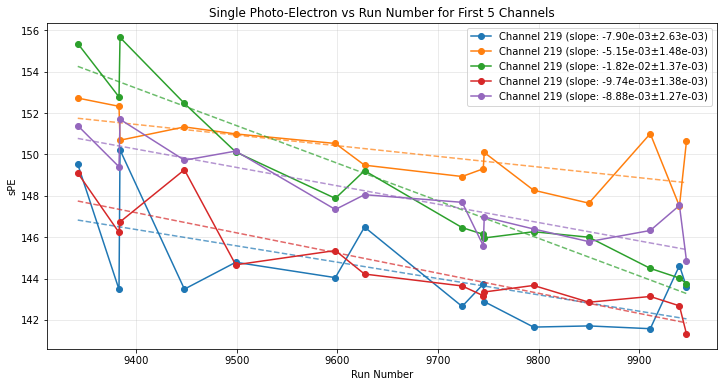

In [211]:
plt.figure(figsize=(12, 6))
for i in range(5):
    color = f'C{i}'
    gains = [sPEs[run][i] for run in sorted_runs]
    plt.plot(sorted_runs, gains, marker='o', color=color)
    coeffs = np.polyfit(sorted_runs, gains, 1)
    slope = coeffs[0]
    # Calculate the covariance matrix to get the error on the slope
    cov_matrix = np.polyfit(sorted_runs, gains, 1, cov=True)[1]
    slope_error = np.sqrt(cov_matrix[0, 0])

    # Draw the fit line with the same color
    fit_line = np.poly1d(coeffs)
    plt.plot(sorted_runs, fit_line(sorted_runs), '--', color=color, alpha=0.7)

    # Update legend to include slope information
    plt.plot([], [], marker='o', color=color, label=f'Channel {ichan} (slope: {slope:.2e}±{slope_error:.2e})')

plt.xlabel('Run Number')
plt.ylabel('sPE')
plt.title('Single Photo-Electron vs Run Number for First 5 Channels')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



In [163]:
fin = r.TFile.Open("root://fndcadoor.fnal.gov://sbn/data/sbn_fd/poms_production/data/Reproc_Run2_SBN/reconstructed/icaruscode_v10_06_00_01p05/bnbmajority/calibtuples/ea/e8/hist_compressed_data_dl4_fstrmBNBMAJORITY_run9342_14_20250709T164332_bnb_20250709T171015_stage1_caf_larcv-6aae1582-5332-4aed-baa5-dfcb1e8b0e58.root")
fin.cd("simpleLightAna/")
mytree = fin.Get("simpleLightAna/opflashCryoE_flashtree")
mytree.Print()
#mytree.Scan("pe_pmt")
#fin.ls()

******************************************************************************
*Tree    :opflashCryoE_flashtree: TTree for the recob::Flashes with label opflashCryoE   *
*Entries :      452 : Total =         7274118 bytes  File  Size =     968306 *
*        :          : Tree compression factor =   7.53                       *
******************************************************************************
*Br    0 :run       : run/I                                                  *
*Entries :      452 : Total  Size=       2373 bytes  File Size  =        128 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=  14.81     *
*............................................................................*
*Br    1 :event     : event/I                                                *
*Entries :      452 : Total  Size=       2383 bytes  File Size  =        328 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   5.79     *
*.......................................

Warning in <TClass::Init>: no dictionary for class sbn::TrackInfo is available
Warning in <TClass::Init>: no dictionary for class sbn::MetaInfo is available
Warning in <TClass::Init>: no dictionary for class sbn::TrackHitInfo is available
Warning in <TClass::Init>: no dictionary for class sbn::HitInfo is available
Warning in <TClass::Init>: no dictionary for class sbn::Vector3D is available
Warning in <TClass::Init>: no dictionary for class sbn::HitTruth is available
Warning in <TClass::Init>: no dictionary for class sbn::WireInfo is available
Warning in <TClass::Init>: no dictionary for class sbn::TrackTruth is available
Warning in <TClass::Init>: no dictionary for class sbn::TrueParticle is available
Warning in <TClass::Init>: no dictionary for class sbn::TrueHit is available


[[0, 0, 0, 1.04, 1.5, 0, 5.99, 4.93, 6.69, 5.22, ... 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
[2.83e+04, 2.45e+04, 3.8e+04, 1.94e+04, ... 2.23e+04, 1.81e+04, 1.08e+04, 1.23e+04]
[89, 142, 153, 89, 95, 71, 92, 102, 92, 82, ... 53, 100, 56, 87, 113, 83, 71, 83, 90]


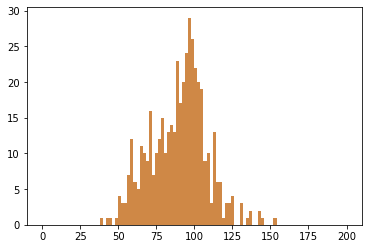

In [186]:
fin = uproot.open('root://fndcadoor.fnal.gov://sbn/data/sbn_fd/poms_production/data/Reproc_Run2_SBN/reconstructed/icaruscode_v10_06_00_01p05/bnbmajority/calibtuples/ea/e8/hist_compressed_data_dl4_fstrmBNBMAJORITY_run9342_14_20250709T164332_bnb_20250709T171015_stage1_caf_larcv-6aae1582-5332-4aed-baa5-dfcb1e8b0e58.root:simpleLightAna/opflashCryoE_flashtree')
pmt = fin['pe_pmt'].array()
pmtCount = ak.count_nonzero(pmt, axis=1) 
sum = fin['sum_pe'].array()
mult = fin['multiplicity'].array()
print(pmt)
print(sum)
#plt.hist(ak.to_numpy(sum), bins=250, range=(0, 25000), histtype='stepfilled', alpha=0.7)
plt.hist(ak.to_numpy(pmtCount), bins=100, range=(0, 200), histtype='stepfilled', alpha=0.7)
plt.hist(ak.to_numpy(mult), bins=100, range=(0, 200), histtype='stepfilled', alpha=0.7)
print(pmtCount)

In [76]:
flist = []
runs = []
with open('/nashome/m/micarrig/icarus/pmt/v10_06_00_01p04/calFiles.list', 'r') as cal_files:
    for line in cal_files:
        this_run = int(line.strip().split('/')[-1].split('_')[5].replace('run', ''))
        if this_run in runs: continue
        runs.append(this_run)
        #flist.append(f'{line.strip()}:simpleLightAna/ophit_ttree')
        flist.append(f'{line.strip()}:simpleLightAna/opflashCryoW_ophittree')


runs, flist = zip(*sorted(zip(runs, flist)))

#reduce file list for testing
runs = runs[::10]
flist = flist[::10]

print(len(flist))
print(runs)
print(flist )

37
(9301, 9321, 9337, 9354, 9365, 9389, 9409, 9437, 9448, 9559, 9571, 9592, 9604, 9642, 9690, 9707, 9727, 9745, 9758, 9769, 9794, 9833, 9844, 9860, 9878, 9892, 9921, 9949, 9960, 9971, 9986, 10003, 10020, 10035, 10049, 10064, 10097)
('root://fndcadoor.fnal.gov:/sbn/data/sbn_fd/poms_production/data/Reproc_Run2_SBN/reconstructed/icaruscode_v10_06_00_01p05/bnbmajority/calibtuples/46/b5/hist_compressed_data_dl6_fstrmBNBMAJORITY_run9301_2_20250709T172940_bnb_20250709T185231_stage1_caf_larcv-05e511dc-f0eb-4b2e-8de0-0911fcf85aa6.root:simpleLightAna/opflashCryoW_ophittree', 'root://fndcadoor.fnal.gov:/sbn/data/sbn_fd/poms_production/data/Reproc_Run2_SBN/reconstructed/icaruscode_v10_06_00_01p05/bnbmajority/calibtuples/24/4d/hist_compressed_data_dl9_fstrmBNBMAJORITY_run9321_1_20250718T195538_bnb_20250718T195713_stage1_caf_larcv-948291a0-8980-4429-9419-ed13cec4c938.root:simpleLightAna/opflashCryoW_ophittree', 'root://fndcadoor.fnal.gov:/sbn/data/sbn_fd/poms_production/data/Reproc_Run2_SBN/reconstr

In [77]:
hist_norm = []
hist_recal = []

norm_pe = {}
recal_pe = {}
chan = {}
amplitude = {}

for run in runs:
    #hist_norm.append(r.TH1F(f"h_norm_run{run}", f"Run {run} PE distribution", 100, 0, 10))
    #hist_recal.append(r.TH1F(f"h_recal_run{run}", f"Run {run} Recal PE distribution", 100, 0, 10))
    norm_pe[run] = np.array([])
    recal_pe[run] = np.array([])
    chan[run] = np.array([])
    amplitude[run] = np.array([])


branches = ['run', 'channel_id', 'amplitude', 'integral', 'pe']
for ifile, batch in enumerate(uproot.iterate(flist, branches, step_size='50 MB')):
    #if ifile > 50: break
    runs = batch['run'].to_numpy()
    this_run = runs[0]
    if (runs != this_run).any():
        print(runs[runs != this_run])
    sel = batch['amplitude'] > -1
    pes = batch['pe'][sel].to_numpy()
    channels = batch['channel_id'][sel].to_numpy()
    amplitudes = batch['amplitude'][sel].to_numpy()
    norm_pe[this_run] = np.concatenate((norm_pe[this_run], pes))
    chan[this_run] = np.concatenate((chan[this_run], channels))
    amplitude[this_run] = np.concatenate((amplitude[this_run], amplitudes))

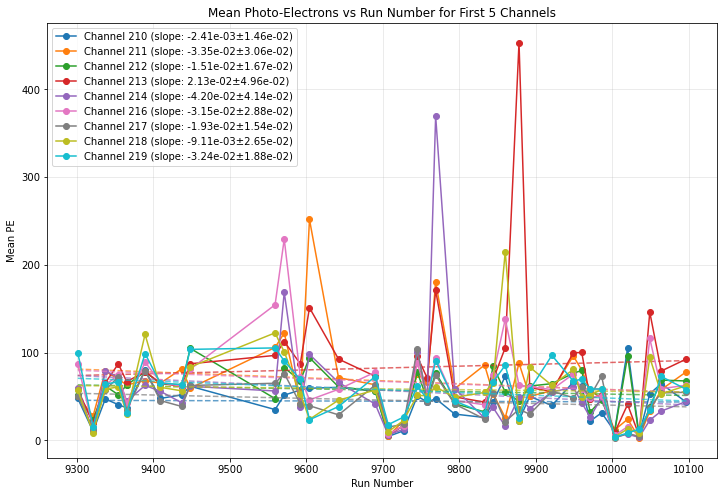

In [78]:
plt.figure(figsize=(12, 8))

chan_means = {}

chan_start = 210
chan_end = 220

# Calculate mean PE for each channel in each run
for run_num in norm_pe.keys():
    if len(norm_pe[run_num]) == 0:  # Skip runs with no data
        continue
    
    chan_means[run_num] = {}
    run_chans = chan[run_num]
    
    # Calculate mean for each channel in this run
    for ichan in range(chan_start, chan_end):  # Assuming channels 0-359
        channel_mask = run_chans == ichan
        if np.any(channel_mask):
            this_chanPE = norm_pe[run_num][channel_mask]
            if len(this_chanPE) > 0:
                chan_means[run_num][ichan] = np.mean(this_chanPE)

# Plot mean PE vs run number for first few channels
sorted_runs = sorted(chan_means.keys())

for ichan in range(chan_start, chan_end):  # Plot specified channel range
    mean_values = []
    run_numbers = []
    
    for run_num in sorted_runs:
        if ichan in chan_means[run_num]:
            mean_values.append(chan_means[run_num][ichan])
            run_numbers.append(run_num)
    
    if len(mean_values) > 0:
        color = f'C{ichan}'
        plt.plot(run_numbers, mean_values, marker='o', color=color)
        
        # Add linear fit
        if len(run_numbers) > 1:  # Need at least 2 points for a fit
            coeffs = np.polyfit(run_numbers, mean_values, 1)
            slope = coeffs[0]
            # Calculate the covariance matrix to get the error on the slope
            cov_matrix = np.polyfit(run_numbers, mean_values, 1, cov=True)[1]
            slope_error = np.sqrt(cov_matrix[0, 0])
            
            # Draw the fit line with the same color
            fit_line = np.poly1d(coeffs)
            plt.plot(run_numbers, fit_line(run_numbers), '--', color=color, alpha=0.7)
            
            # Update legend to include slope information
            plt.plot([], [], marker='o', color=color, label=f'Channel {ichan} (slope: {slope:.2e}±{slope_error:.2e})')
        else:
            plt.plot([], [], marker='o', color=color, label=f'Channel {ichan}')

plt.xlabel('Run Number')
plt.ylabel('Mean PE')
plt.title('Mean Photo-Electrons vs Run Number for First 5 Channels')
plt.legend()
plt.grid(True, alpha=0.3)
#plt.show()



Fit failed for run 10064, channel 212, mpv 54.31566316335256, sigma 24.688325287724783, status 3


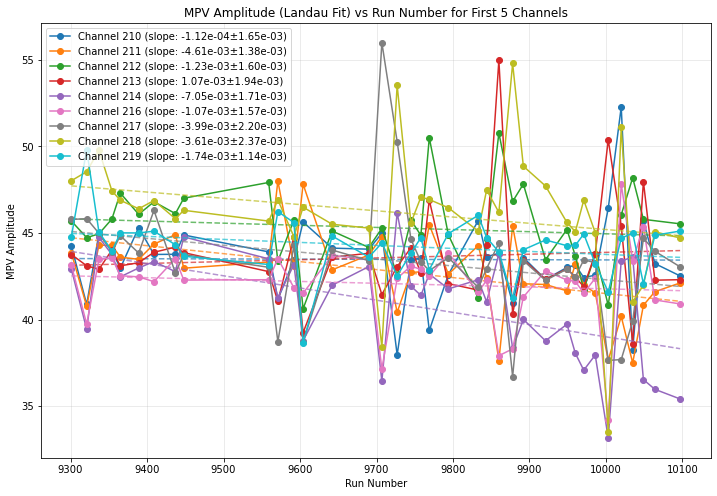

In [80]:
#fit amplitude distribution with landau to get MPV and plot as function of run number

def getFit(hInt):
    # Fit with Landau distribution using ROOT
    h_landau = r.TH1F("h_landau", "Amplitude Distribution", 100, 0, 100)
    data_array = ak.to_numpy(hInt)
    h_landau.FillN(len(data_array), arr.array('d', data_array), np.ones(len(data_array)))

    if h_landau.Integral() == 0:
        print("No entries in histogram for fitting.")
        return None, None, None

    # Create Landau function
    landau_func = r.TF1("landau_fit", "landau", 0, 100)
    landau_func.SetParameters(1, 40, 10)  # Initial guesses for amplitude, MPV, width
    landau_func.SetParLimits(1, 0, 100)  # Limit MPV parameter
    landau_func.SetParLimits(2, 0, 50)  # Limit width parameter
    fit = h_landau.Fit(landau_func, "SQBLL")

    # Get fit parameters
    mpv = landau_func.GetParameter(1)  # Most Probable Value
    sigma = landau_func.GetParameter(2)  # Width parameter
    return fit, mpv, sigma

plt.figure(figsize=(12, 8))

chan_means = {}

chan_start = 210
chan_end = 220

# Calculate mean PE for each channel in each run
for run_num in amplitude.keys():
    if len(amplitude[run_num]) == 0:  # Skip runs with no data
        continue
    
    chan_means[run_num] = {}
    run_chans = chan[run_num]
    
    # Calculate mean for each channel in this run
    for ichan in range(chan_start, chan_end):  # Assuming channels 0-359
        channel_mask = run_chans == ichan
        if np.any(channel_mask):
            this_chanPE = amplitude[run_num][channel_mask]
            if len(this_chanPE) > 0:
                fit, mpv, sigma = getFit(this_chanPE)
                if fit.Status() != 0:
                    print(f"Fit failed for run {run_num}, channel {ichan}, mpv {mpv}, sigma {sigma}, status {fit.Status()}")
                    continue
                chan_means[run_num][ichan] = mpv

# Plot mean PE vs run number for first few channels
sorted_runs = sorted(chan_means.keys())

for ichan in range(chan_start, chan_end):  # Plot specified channel range
    mean_values = []
    run_numbers = []
    
    for run_num in sorted_runs:
        if ichan in chan_means[run_num]:
            mean_values.append(chan_means[run_num][ichan])
            run_numbers.append(run_num)
    
    if len(mean_values) > 0:
        color = f'C{ichan}'
        plt.plot(run_numbers, mean_values, marker='o', color=color)
        
        # Add linear fit
        if len(run_numbers) > 1:  # Need at least 2 points for a fit
            coeffs = np.polyfit(run_numbers, mean_values, 1)
            slope = coeffs[0]
            # Calculate the covariance matrix to get the error on the slope
            cov_matrix = np.polyfit(run_numbers, mean_values, 1, cov=True)[1]
            slope_error = np.sqrt(cov_matrix[0, 0])
            
            # Draw the fit line with the same color
            fit_line = np.poly1d(coeffs)
            plt.plot(run_numbers, fit_line(run_numbers), '--', color=color, alpha=0.7)
            
            # Update legend to include slope information
            plt.plot([], [], marker='o', color=color, label=f'Channel {ichan} (slope: {slope:.2e}±{slope_error:.2e})')
        else:
            plt.plot([], [], marker='o', color=color, label=f'Channel {ichan}')

plt.xlabel('Run Number')
plt.ylabel('MPV Amplitude')
plt.title('MPV Amplitude (Landau Fit) vs Run Number for First 5 Channels')
plt.legend()
plt.grid(True, alpha=0.3)
#plt.show()



In [135]:
chan_means = {}
channel_slopes = {}

chan_start = 0
chan_end = 400

# Calculate mean PE for each channel in each run
for run_num in norm_pe.keys():
    if len(norm_pe[run_num]) == 0:  # Skip runs with no data
        continue
    
    chan_means[run_num] = {}
    run_chans = chan[run_num]
    
    # Calculate mean for each channel in this run
    for ichan in range(chan_start, chan_end):
        channel_mask = run_chans == ichan
        if np.any(channel_mask):
            this_chanPE = norm_pe[run_num][channel_mask]
            if len(this_chanPE) > 0:
                chan_means[run_num][ichan] = np.mean(this_chanPE)

# Calculate slopes for each channel
sorted_runs = sorted(chan_means.keys())

for ichan in range(chan_start, chan_end):
    mean_values = []
    run_numbers = []
    
    for run_num in sorted_runs:
        if ichan in chan_means[run_num]:
            mean_values.append(chan_means[run_num][ichan])
            run_numbers.append(run_num)
    
    if len(mean_values) > 1:  # Need at least 2 points for a fit
        coeffs = np.polyfit(run_numbers, mean_values, 1)
        slope = coeffs[0]
        # Calculate the covariance matrix to get the error on the slope
        cov_matrix = np.polyfit(run_numbers, mean_values, 1, cov=True)[1]
        slope_error = np.sqrt(cov_matrix[0, 0])
        channel_slopes[ichan] = [slope, slope_error]



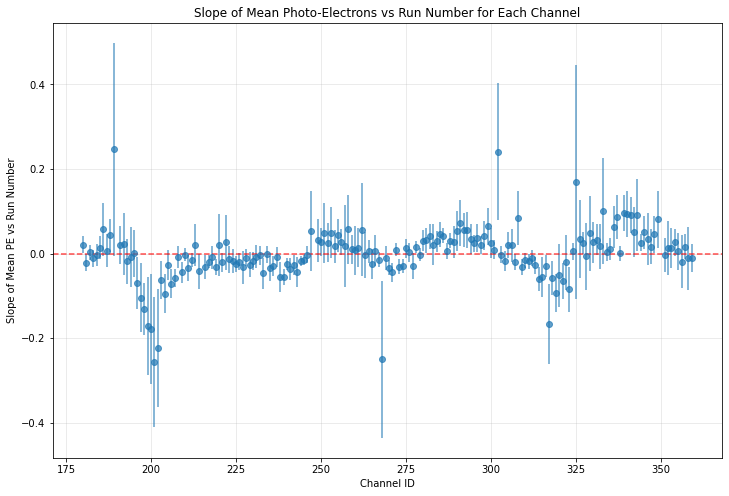

In [136]:
plt.figure(figsize=(12, 8))
plt.errorbar(channel_slopes.keys(), [slope[0] for slope in channel_slopes.values()], yerr=[slope[1] for slope in channel_slopes.values()], fmt='o', alpha=0.7)
plt.xlabel('Channel ID')
plt.ylabel('Slope of Mean PE vs Run Number')
plt.title('Slope of Mean Photo-Electrons vs Run Number for Each Channel')
plt.grid(True, alpha=0.3)

plt.axhline(0, color='red', linestyle='--', alpha=0.7)
plt.show()

In [161]:
chan_means = {}
channel_slopes = {}

chan_start = 0
chan_end = 400

# Calculate mean PE for each channel in each run
for run_num in norm_pe.keys():
    if len(norm_pe[run_num]) == 0:  # Skip runs with no data
        continue
    
    chan_means[run_num] = {}
    run_chans = chan[run_num]
    
    # Calculate mean for each channel in this run
    for ichan in range(chan_start, chan_end):
        channel_mask = run_chans == ichan
        if np.any(channel_mask):
            this_chanPE = norm_pe[run_num][channel_mask]
            if len(this_chanPE) > 50:
                fit, mpv, sigma = getFit(this_chanPE)
                if fit is None: continue
                if fit.Status() != 0:
                    print(f"Fit failed for run {run_num}, channel {ichan}, mpv {mpv}, sigma {sigma}, status {fit.Status()}")
                    continue
                chan_means[run_num][ichan] = mpv

# Calculate slopes for each channel
sorted_runs = sorted(chan_means.keys())

for ichan in range(chan_start, chan_end):
    mean_values = []
    run_numbers = []
    
    for run_num in sorted_runs:
        if ichan in chan_means[run_num]:
            mean_values.append(chan_means[run_num][ichan])
            run_numbers.append(run_num)
    
    if len(mean_values) > 1:  # Need at least 2 points for a fit
        coeffs = np.polyfit(run_numbers, mean_values, 1)
        slope = coeffs[0]
        # Calculate the covariance matrix to get the error on the slope
        cov_matrix = np.polyfit(run_numbers, mean_values, 1, cov=True)[1]
        slope_error = np.sqrt(cov_matrix[0, 0])
        channel_slopes[ichan] = [slope, slope_error]



Fit failed for run 9301, channel 192, mpv 1.374149734748653, sigma 2.4213901146884615, status 3
Fit failed for run 9301, channel 218, mpv 0.36955653740525135, sigma 0.9007624406091049, status 3
Fit failed for run 9301, channel 223, mpv 1.4862701170049482, sigma 0.3396686229219514, status 3
Fit failed for run 9301, channel 243, mpv 1.4508472711945333, sigma 0.5308303062427361, status 3
Fit failed for run 9301, channel 258, mpv 1.9038321541964587, sigma 1.1536074166181245, status 3
Fit failed for run 9301, channel 270, mpv 0.25626866784172725, sigma 3.4526264084359326, status 3
Fit failed for run 9301, channel 275, mpv 6.892554920396855, sigma 5.007714660054943, status 3
Fit failed for run 9301, channel 277, mpv 0.3126082919450915, sigma 2.7699104744092335, status 3
Fit failed for run 9301, channel 283, mpv 6.388349615071229, sigma 4.248046985284955, status 3
Fit failed for run 9301, channel 288, mpv 1.5123564100670026, sigma 0.34492541383896014, status 3
Fit failed for run 9301, channel

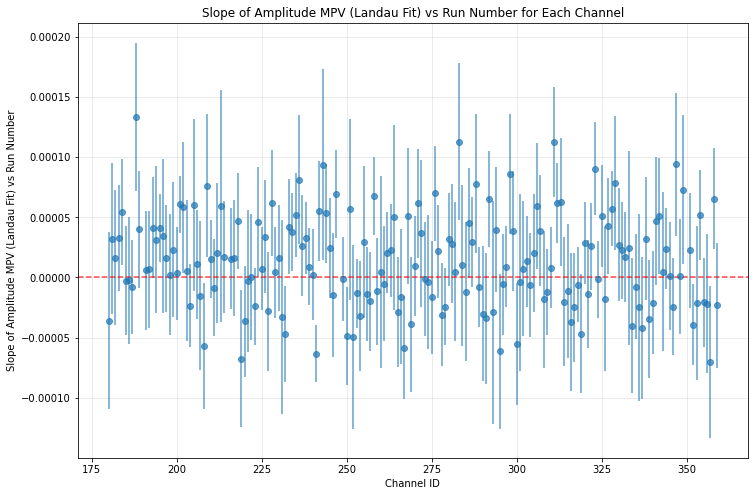

In [163]:
plt.figure(figsize=(12, 8))
plt.errorbar(channel_slopes.keys(), [slope[0] for slope in channel_slopes.values()], yerr=[slope[1] for slope in channel_slopes.values()], fmt='o', alpha=0.7)
plt.xlabel('Channel ID')
plt.ylabel('Slope of Amplitude MPV (Landau Fit) vs Run Number')
plt.title('Slope of Amplitude MPV (Landau Fit) vs Run Number for Each Channel')
plt.grid(True, alpha=0.3)

plt.axhline(0, color='red', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
flist = []
runs = []
with open('/nashome/m/micarrig/icarus/pmt/v10_06_00_01p04/calFiles.list', 'r') as cal_files:
    for line in cal_files:
        this_run = int(line.strip().split('/')[-1].split('_')[5].replace('run', ''))
        #if this_run in runs: continue
        runs.append(this_run)
        #flist.append(f'{line.strip()}:simpleLightAna/ophit_ttree')
        flist.append(f'{line.strip()}:simpleLightAna/opflashCryoE_flashtree')


runs, flist = zip(*sorted(zip(runs, flist)))

#reduce file list for testing
runs = runs[::100]
flist = flist[::100]

hist_norm = []
hist_recal = []

norm_pe = {}
recal_pe = {}
chan = {}
amplitude = {}
sum_pe = {}

for run in runs:
    #hist_norm.append(r.TH1F(f"h_norm_run{run}", f"Run {run} PE distribution", 100, 0, 10))
    #hist_recal.append(r.TH1F(f"h_recal_run{run}", f"Run {run} Recal PE distribution", 100, 0, 10))
    norm_pe[run] = np.array([])
    recal_pe[run] = np.array([])
    sum_pe[run] = np.array([])


branches = ['run', 'pe_pmt', 'sum_pe']
for ifile, batch in enumerate(uproot.iterate(flist, branches, step_size='50 MB')):
    #if ifile > 50: break
    if ifile % 10 == 0:
        print(f"Processing file {ifile+1} / {len(flist)}")
    runs = batch['run'].to_numpy()
    this_run = runs[0]
    if (runs != this_run).any():
        print(runs[runs != this_run])
    sel = batch['pe_pmt'] > -1
    pes = batch['pe_pmt'][sel].to_numpy()
    sum_pe_ = batch['sum_pe'].to_numpy()
    sum_pe[this_run] = np.concatenate((sum_pe[this_run], sum_pe_))

    if len(pes) > 0:
        if len(norm_pe[this_run]) == 0:
            norm_pe[this_run] = pes
        else:
            norm_pe[this_run] = np.concatenate((norm_pe[this_run], pes))


Processing file 1 / 3596
Processing file 11 / 3596
Processing file 21 / 3596
Processing file 31 / 3596
Processing file 41 / 3596
Processing file 51 / 3596
Processing file 61 / 3596
Processing file 71 / 3596
Processing file 81 / 3596
Processing file 91 / 3596
Processing file 101 / 3596
Processing file 111 / 3596
Processing file 121 / 3596
Processing file 131 / 3596
Processing file 141 / 3596
Processing file 151 / 3596
Processing file 161 / 3596
Processing file 171 / 3596
Processing file 181 / 3596
Processing file 191 / 3596
Processing file 201 / 3596
Processing file 211 / 3596
Processing file 221 / 3596
Processing file 231 / 3596
Processing file 241 / 3596
Processing file 251 / 3596
Processing file 261 / 3596
Processing file 271 / 3596
Processing file 281 / 3596
Processing file 291 / 3596
Processing file 301 / 3596
Processing file 311 / 3596
Processing file 321 / 3596
Processing file 331 / 3596
Processing file 341 / 3596
Processing file 351 / 3596
Processing file 361 / 3596
Processing f

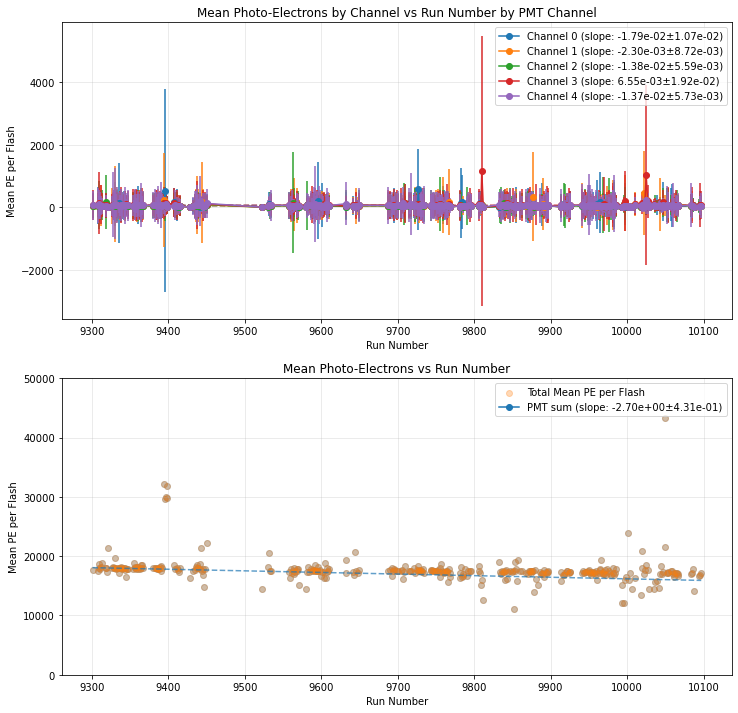

In [200]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.xlabel('Run Number')
plt.ylabel('Mean PE per Flash')
plt.title('Mean Photo-Electrons by Channel vs Run Number by PMT Channel')
plt.grid(True, alpha=0.3)

# Calculate mean PE for each PMT channel in each run
run_means = {}
run_stds = {}
run_totalMean = {}
sorted_runs = sorted(norm_pe.keys())

for run_num in sorted_runs:
    pe_data = norm_pe[run_num]
    if len(pe_data) == 0:
        continue
    pe_dataSum = np.sum(pe_data, axis=1)
    
    # Each flash has 360 PMT values, so reshape accordingly
    n_pmts = 360    
    n_flashes = len(pe_data) #// n_pmts
    #print("Number of flashes in run ", run_num, " is ", n_flashes)
    
    if n_flashes > 0:
        # Reshape and calculate mean for each PMT
        means = []
        stds = []
        for i in range(n_pmts):
            #if i == 0: print(pe_data, pe_data[:][i], np.mean(pe_data[:][i]))
            means.append(np.mean(pe_data[:, i][pe_data[:, i] >= 0]))
            stds.append(np.std(pe_data[:, i][pe_data[:, i] >= 0]))
        run_means[run_num] = means
        run_stds[run_num] = stds
        run_totalMean[run_num] = np.mean(pe_dataSum)

# Plot mean PE vs run number for first 10 PMT channels
for pmt_ch in range(5):
    color = f'C{pmt_ch}'
    mean_values = []
    run_numbers = []
    std_values = []
    
    for run_num in sorted_runs:
        if run_num in run_means and len(run_means[run_num]) > pmt_ch:
            mean_values.append(run_means[run_num][pmt_ch])
            std_values.append(run_stds[run_num][pmt_ch])
            run_numbers.append(run_num)
    
    if len(mean_values) > 0:
        plt.errorbar(run_numbers, mean_values, yerr=std_values, marker='o', color=color)

    # Add linear fit
    if len(run_numbers) > 1:  # Need at least 2 points for a fit
        coeffs = np.polyfit(run_numbers, mean_values, 1)
        slope = coeffs[0]
        # Calculate the covariance matrix to get the error on the slope
        cov_matrix = np.polyfit(run_numbers, mean_values, 1, cov=True)[1]
        slope_error = np.sqrt(cov_matrix[0, 0])
        
        # Draw the fit line with the same color
        fit_line = np.poly1d(coeffs)
        plt.plot(run_numbers, fit_line(run_numbers), '--', color=color, alpha=0.7)
        plt.plot([], [], marker='o', color=color, label=f'Channel {pmt_ch} (slope: {slope:.2e}±{slope_error:.2e})')


# Calculate mean sum_pe for each run
meanSum = []
sigmaSum = []
plotRuns = []
for run_num in sorted_runs:
    sum_pe_data = sum_pe[run_num]
    if len(sum_pe_data) == 0:
        #meanSum.append(0)
        #sigmaSum.append(0)
        continue
    meanSum.append(np.mean(sum_pe_data))
    sigmaSum.append(np.std(sum_pe_data))
    plotRuns.append(run_num)
    #print("run: ", run_num, " mean sum pe: ", meanSum[-1], " std: ", sigmaSum[-1], " entries: ", len(sum_pe_data))
plt.legend()

weights = 1/np.array(sigmaSum)
# Plot the second subplot after the first subplot is complete
plt.subplot(2, 1, 2)
plt.scatter(plotRuns, meanSum, alpha=0.3)
plt.scatter(run_totalMean.keys(), run_totalMean.values(), label='Total Mean PE per Flash', alpha=0.3)
# Add linear fit
if len(plotRuns) > 1:  # Need at least 2 points for a fit
    coeffs = np.polyfit(plotRuns, meanSum, 1, w=weights, cov=True)
    slope = coeffs[0][0]  # coeffs is now a tuple (coefficients, covariance_matrix)
    intercept = coeffs[0][1]
    slope_error = np.sqrt(coeffs[1][0, 0])  # Extract slope error from covariance matrix

    # Draw the fit line
    fit_line = np.poly1d(coeffs[0])  # Use coefficients, not the tuple
    plt.plot(plotRuns, fit_line(plotRuns), color='C0', linestyle='--', alpha=0.7)
    plt.plot([], [], marker='o', color='C0', label=f'PMT sum (slope: {slope:.2e}±{slope_error:.2e})')
plt.xlabel('Run Number')
plt.ylabel('Mean PE per Flash')
plt.ylim(0, 50e3)
plt.title('Mean Photo-Electrons vs Run Number')
plt.legend()
plt.grid(True, alpha=0.3)



In [ ]:
from scipy.optimize import curve_fit
import imageio
import os

# Create directory for individual plots
plot_dir = '/nashome/m/micarrig/icarus/pmt/v10_06_00_01p04/sum_pe_plots'
os.makedirs(plot_dir, exist_ok=True)

# Store filenames for GIF creation
filenames = []

# Get sorted list of runs
sorted_runs = sorted(norm_pe.keys())

# Loop through all runs
for run_num in sorted_runs:
    if len(sum_pe[run_num]) == 0:
        continue
        
    plt.figure(figsize=(10, 6))
    plt.hist(sum_pe[run_num], bins=100, range=(0, 50000), histtype='stepfilled', alpha=0.7)
    plt.xlabel('Sum PE per Flash')
    plt.ylabel('Counts')
    plt.title(f'Sum PE Distribution for Run {run_num}')
    
    # Use the same data for both histogram and fitting
    data_array = sum_pe[run_num]
    
    # Calculate histogram for fitting with matching range
    counts, bin_edges = np.histogram(data_array, bins=100, range=(0, 50000))
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Remove bins with zero counts for better fitting
    mask = counts > 0
    counts_filtered = counts[mask]
    bin_centers_filtered = bin_centers[mask]
    
    # Gaussian function
    def gaussian(x, amplitude, mean, sigma):
        return amplitude * np.exp(-0.5 * ((x - mean) / sigma)**2)
    
    # Initial parameter guesses based on actual data
    initial_guess = [np.max(counts_filtered), np.mean(data_array), np.std(data_array)]
    
    try:
        # Fit gaussian with filtered data
        popt, pcov = curve_fit(gaussian, bin_centers_filtered, counts_filtered, p0=initial_guess)
        
        # Plot the fit over the full range
        x_fit = np.linspace(0, 50000, 5000)
        y_fit = gaussian(x_fit, *popt)
        plt.plot(x_fit, y_fit, 'r-', linewidth=2, 
                label=f'Gaussian Fit\nμ={popt[1]:.0f}, σ={popt[2]:.0f}')
        plt.legend()
    except Exception as e:
        print(f"Gaussian fit failed for run {run_num}: {e}")

    plt.grid(True, alpha=0.3)
    
    # Save plot
    filename = f'{plot_dir}/run_{run_num:05d}.png'
    plt.savefig(filename, dpi=100, bbox_inches='tight')
    filenames.append(filename)
    plt.close()  # Close to save memory
    
    print(f"Processed run {run_num}, mean: {np.mean(sum_pe[run_num]):.0f}, std: {np.std(sum_pe[run_num]):.0f}")

Processed run 9301, mean: 17704, std: 11080
Processed run 9308, mean: 17577, std: 10555
Processed run 9309, mean: 17972, std: 10408
Processed run 9310, mean: 18671, std: 9871
Processed run 9311, mean: 17827, std: 10793
Processed run 9312, mean: 18235, std: 14951
Processed run 9314, mean: 18775, std: 12529
Processed run 9318, mean: 17955, std: 11409
Processed run 9319, mean: 17967, std: 18581


/cvmfs/sft.cern.ch/lcg/views/LCG_105_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Processed run 9320, mean: 17347, std: 9988
Processed run 9321, mean: 21371, std: 18155
Processed run 9327, mean: 18081, std: 13871
Processed run 9328, mean: 18128, std: 10513
Processed run 9329, mean: 18047, std: 15044
Processed run 9330, mean: 17947, std: 10893
Processed run 9331, mean: 19617, std: 19562
Processed run 9332, mean: 17882, std: 12058
Processed run 9333, mean: 18001, std: 10796
Processed run 9335, mean: 17952, std: 13999
Processed run 9336, mean: 17237, std: 9347
Processed run 9337, mean: 18019, std: 15561
Processed run 9338, mean: 18115, std: 11147
Processed run 9339, mean: 18093, std: 10733
Processed run 9340, mean: 17813, std: 11013
Processed run 9342, mean: 18028, std: 11448
Processed run 9343, mean: 17956, std: 11883
Processed run 9344, mean: 17723, std: 11579
Processed run 9345, mean: 16543, std: 5210
Processed run 9346, mean: 17895, std: 11143
Processed run 9347, mean: 17887, std: 11238
Processed run 9354, mean: 17865, std: 12348
Processed run 9355, mean: 18904, st

/tmp/ipykernel_76203/2182618538.py:72: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


GIF created: /nashome/m/micarrig/icarus/pmt/v10_06_00_01p04/sum_pe_evolution.gif
Total plots created: 338


In [ ]:
# Create GIF
gif_filename = '/nashome/m/micarrig/icarus/pmt/v10_06_00_01p04/sum_pe_evolution.gif'
with imageio.get_writer(gif_filename, mode='I', duration=1) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

print(f"GIF created: {gif_filename}")
print(f"Total plots created: {len(filenames)}")

/tmp/ipykernel_76203/3999732671.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


GIF created: /nashome/m/micarrig/icarus/pmt/v10_06_00_01p04/sum_pe_evolution.gif
Total plots created: 338


In [109]:
def getSPECalInfo():
    speFiles = {}
    with open('/nashome/m/micarrig/icarus/pmt/v10_06_00_01p04/speFiles.txt', 'r') as f:
        for line in f:
            filename = line.strip()
            run_num = int(filename.split('_')[1].replace('run', ''))  # Extract run number
            if run_num in speFiles:
                print("Duplicate SPE run found:", run_num)
            else:
                speFiles[run_num] = filename
    return speFiles

def getCalFiles(start=None, stop=None):
    calRuns = []
    calFiles = []
    with open('/nashome/m/micarrig/icarus/pmt/v10_06_00_01p04/calFiles.list', 'r') as cal_files:
        for line in cal_files:
            this_run = int(line.strip().split('/')[-1].split('_')[5].replace('run', ''))
            if start is not None and this_run < start:
                continue
            if stop is not None and this_run > stop:
                continue
            calRuns.append(this_run)
            calFiles.append(f'{line.strip()}:simpleLightAna/opflashCryoE_flashtree')
            calRuns.append(this_run)
            calFiles.append(f'{line.strip()}:simpleLightAna/opflashCryoW_flashtree')

    calRuns, calFiles = zip(*sorted(zip(calRuns, calFiles)))
    return calRuns, calFiles

def getSPECalibrationRun(calRuns, speFiles):
    # For each calRun, find the most recent speRun
    recent_spe_for_cal = {}
    for cal_run in calRuns:
        # Find all speRuns that are <= cal_run
        valid_spe_runs = [spe_run for spe_run in list(speFiles.keys()) if spe_run <= cal_run]
        if valid_spe_runs:
            # Get the most recent (maximum) speRun
            recent_spe_for_cal[cal_run] = [max(valid_spe_runs), speFiles[max(valid_spe_runs)]]
        else:
            print("No valid SPE run found for cal run:", cal_run)
            recent_spe_for_cal[cal_run] = [None, None]
    return recent_spe_for_cal

# https://github.com/SBNSoftware/icaruscode/blob/develop/icaruscode/PMT/OpReco/fcl/icarus_spe.fcl#L20C9-L20C16
def recalibratePE(pe, newGain, oldGain=256.658):
    recalPE = pe * (oldGain / newGain)
    return recalPE

#convert q from electrons to adc * tick
# clock tick = 2ns
# resistance = 50 ohm
# 1 ADC * tick = 0.00488 pC
# electron charge = 1.602e-19 C
def calculate_qADC(cal):
    cal['qADC'] = cal['q'] * 1e7 * 1.602e-19 / (0.00488e-12)

def calculateNewGains(speRuns):
    newGains = {}
    for ifile, (run, file) in enumerate(speRuns.items()):
        if not file.endswith('.csv'): continue
        cal = pd.read_csv(file)
        calculate_qADC(cal)
        newGains[run] = cal['qADC'].tolist()
    return newGains

def initializeHistograms(calRuns, name, nbins, xmin, xmax):
    h_normPE = {}
    for run in np.unique(calRuns):
        h_normPE[run] = []
        for ichan in range(360):
            h_normPE[run].append(r.TH1F(f"h_{name}_run{run}_chan{ichan}", f"Run {run} Channel {ichan} {name}", nbins, xmin, xmax))

    return h_normPE

def writeHists(fout, hists, dir_name):
    for key, val in hists.items():
        if not fout.GetDirectory(f"run{key}"):
            fout.mkdir(f"run{key}")
        fout.mkdir(f"run{key}/{dir_name}")
        fout.cd(f"run{key}/{dir_name}")
        for hist in val:
            hist.Write()

In [110]:
nPMTs = 360

fout = r.TFile.Open("/nashome/m/micarrig/icarus/pmt/v10_06_00_01p04/pmtPEHistograms.root", "RECREATE")

speFiles = getSPECalInfo()
newGains = calculateNewGains(speFiles)

calRuns, calFiles = getCalFiles(start=9300, stop=9320)
#calRuns = calRuns[60:61]
#calFiles = calFiles[60:61]

speRuns = getSPECalibrationRun(calRuns, speFiles)

print(f"There are {len(calFiles)}, calibration files to process over {len(np.unique(calRuns))} runs.")

h_normPE = initializeHistograms(np.unique(calRuns), "normPE", 100, 0, 10)
h_recalPE = initializeHistograms(np.unique(calRuns), "recalPE", 100, 0, 10)
h_sumPE = initializeHistograms(np.unique(calRuns), "sumPE", 5000, 0, 50000)

branches = ['run', 'pe_pmt', 'sum_pe']
for ifile, batch in enumerate(uproot.iterate(calFiles, branches, step_size='50 MB')):
    #if ifile > 10: break
    if ifile %10 == 0:
        print(f"Processing calibration file {ifile+1} / {len(calFiles)}")
    
    thisRun = batch['run'].to_numpy()[0]
    #print(f"Processing run: {thisRun} and file: {calFiles[ifile]}")

    if ak.any(batch['run'].to_numpy() != calRuns[ifile]):
        print("Mismatch in run numbers:", batch['run'].to_numpy()[0], calRuns[ifile], "skipping run/file...", calRuns[ifile], calFiles[ifile])
        continue

    calRun = speRuns[thisRun][0]

    sumPE = batch['sum_pe'].to_numpy()
    sumPE = sumPE[sumPE >= 0]
    h_sumPE[thisRun][0].FillN(len(sumPE), arr.array('d', sumPE), np.ones(len(sumPE)))
    
    for i in range(nPMTs):

        nPE = batch['pe_pmt'][:, i].to_numpy()
        nPE = nPE[nPE >= 1e-9]
        
        if len(nPE) > 0:
            h_normPE[thisRun][i].FillN(len(nPE), arr.array('d', nPE), np.ones(len(nPE)))

        nPERecal = recalibratePE(nPE, newGain=newGains[calRun][i])
        nPERecal = nPERecal[nPERecal >= 1e-9]
        if len(nPERecal) > 0:
            h_recalPE[thisRun][i].FillN(len(nPERecal), arr.array('d', nPERecal), np.ones(len(nPERecal)))

writeHists(fout, h_normPE, "NormalizedPE")
writeHists(fout, h_recalPE, "RecalibratedPE")
writeHists(fout, h_sumPE, "SumPE")

del h_normPE
del h_recalPE
del h_sumPE

fout.Close()



There are 1558, calibration files to process over 10 runs.
Processing calibration file 1 / 1558
Processing calibration file 11 / 1558
Processing calibration file 21 / 1558
Processing calibration file 31 / 1558
Processing calibration file 41 / 1558
Processing calibration file 51 / 1558
Processing calibration file 61 / 1558
Processing calibration file 71 / 1558
Processing calibration file 81 / 1558
Processing calibration file 91 / 1558
Processing calibration file 101 / 1558
Processing calibration file 111 / 1558
Processing calibration file 121 / 1558
Processing calibration file 131 / 1558
Processing calibration file 141 / 1558
Processing calibration file 151 / 1558
Processing calibration file 161 / 1558
Processing calibration file 171 / 1558
Processing calibration file 181 / 1558
Processing calibration file 191 / 1558
Processing calibration file 201 / 1558
Processing calibration file 211 / 1558
Processing calibration file 221 / 1558
Processing calibration file 231 / 1558
Processing calib

In [108]:
f = uproot.open("root://fndcadoor.fnal.gov:/sbn/data/sbn_fd/poms_production/data/Reproc_Run2_SBN/reconstructed/icaruscode_v10_06_00_01p05/bnbmajority/calibtuples/71/bc/hist_compressed_data_dl11_fstrmBNBMAJORITY_run9308_6_20250712T084338_bnb_20250712T093247_stage1_caf_larcv-cfed5bdc-43f5-40c5-8b89-8b1ddca73811.root:simpleLightAna/opflashCryoE_flashtree")
run = f['run'].array().to_numpy()
print(run)

[9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392
 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392
 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392
 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392
 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392
 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392
 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392
 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392
 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392
 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392
 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392
 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392
 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392
 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392 9392
 9392 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


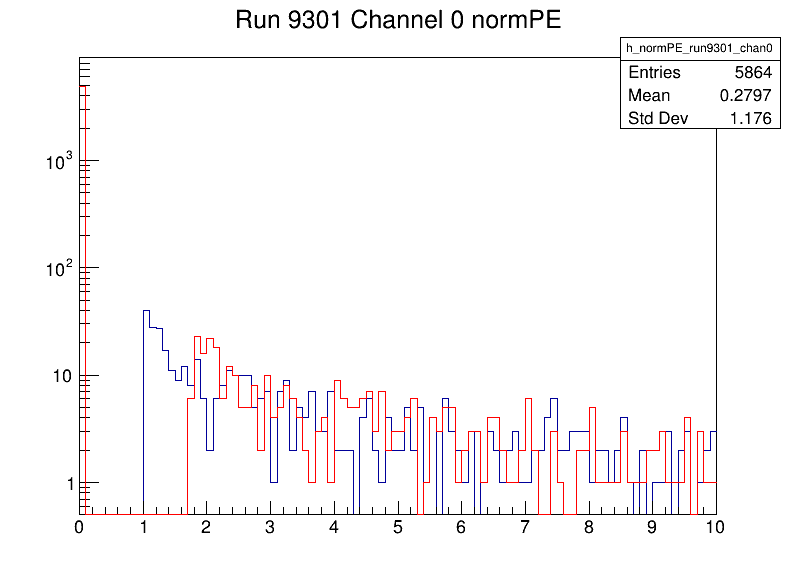

In [47]:
c1 = r.TCanvas("c1", "c1", 800, 600)
h_normPE[9301][0].Draw()
h_recalPE[9301][0].SetLineColor(r.kRed)
h_recalPE[9301][0].Draw("SAME")
c1.Draw()
c1.SetLogy()

In [ ]:
calRuns = []
speRuns = []
calFiles = []
speFiles = []

# https://github.com/SBNSoftware/icaruscode/blob/develop/icaruscode/PMT/OpReco/fcl/icarus_spe.fcl#L20C9-L20C16
oldGain = 256.658

with open('/nashome/m/micarrig/icarus/pmt/v10_06_00_01p04/calFiles.list', 'r') as cal_files:
    for line in cal_files:
        this_run = int(line.strip().split('/')[-1].split('_')[5].replace('run', ''))
        calRuns.append(this_run)
        calFiles.append(f'{line.strip()}:simpleLightAna/opflashCryoE_flashtree')
        calRuns.append(this_run)
        calFiles.append(f'{line.strip()}:simpleLightAna/opflashCryoW_flashtree')


print(len(calFiles), len(calRuns))

with open('/nashome/m/micarrig/icarus/pmt/v10_06_00_01p04/speFiles.txt', 'r') as f:
    for line in f:
        filename = line.strip()
        run_num = int(filename.split('_')[1].replace('run', ''))  # Extract run number
        speRuns.append(run_num)
        speFiles.append(filename)

# Find intersection between speRuns and calRuns
intersection = list(set(speRuns) & set(calRuns))

# For each calRun, find the most recent speRun
recent_spe_for_cal = {}
for cal_run in calRuns:
    # Find all speRuns that are <= cal_run
    valid_spe_runs = [spe_run for spe_run in speRuns if spe_run <= cal_run]
    if valid_spe_runs:
        # Get the most recent (maximum) speRun
        recent_spe_for_cal[cal_run] = max(valid_spe_runs)
    else:
        print("No valid SPE run found for cal run:", cal_run)
        recent_spe_for_cal[cal_run] = None

print(f"Mapping of cal runs to most recent spe runs:")
for cal_run, spe_run in list(recent_spe_for_cal.items())[:10]:  # Show first 10
    print(f"Cal run {cal_run} -> SPE run {spe_run}")

# Get full filenames for intersecting runs
intersecting_cal_files = [calFiles[i] for i, run in enumerate(calRuns) if run in intersection]
intersecting_cal_runs = [run for run in calRuns if run in intersection]
intersecting_spe_files = [speFiles[i] for i, run in enumerate(speRuns) if run in intersection]

print(f"Number of runs in speRuns: {len(speRuns)}")
print(f"Number of runs in calRuns: {len(calRuns)}")
print(f"Number of runs in intersection: {len(intersection)}")

#cal['qADC'] = cal['q'] * 1e7 * 1.602e-19 / (0.00488e-12)

newGains = {}
for ifile, file in enumerate(intersecting_spe_files):
    #if ifile > 1: break
    runNumber = int(file.split('_')[1].replace('run', ''))
    if not file.endswith('.csv'): continue
    cal = pd.read_csv(file)
    calculate_qADC(cal)
    newGains[runNumber] = cal['qADC'].tolist() 


# # Sort sPEs by run number (key)
# Sort both lists by run number
runs, flist = zip(*sorted(zip(intersecting_cal_runs, intersecting_cal_files)))

#reduce file list for testing
#runs = runs[::100]
#flist = flist[::100]

hist_norm = []
hist_recal = []

norm_pe = {}
recal_pe = {}
chan = {}
amplitude = {}
sum_pe = {}

for run in runs:
    #hist_norm.append(r.TH1F(f"h_norm_run{run}", f"Run {run} PE distribution", 100, 0, 10))
    #hist_recal.append(r.TH1F(f"h_recal_run{run}", f"Run {run} Recal PE distribution", 100, 0, 10))
    norm_pe[run] = np.array([])
    recal_pe[run] = np.array([])
    sum_pe[run] = np.array([])

print(flist)
print(runs)

branches = ['run', 'pe_pmt', 'sum_pe']
for ifile, batch in enumerate(uproot.iterate(flist, branches, step_size='50 MB')):
    #if ifile > 50: break
    if ifile % 10 == 0:
        print(f"Processing file {ifile+1} / {len(flist)}")
    runs = batch['run'].to_numpy()
    this_run = runs[0]
    if (runs != this_run).any():
        print(runs[runs != this_run])
    if this_run not in runs:
        print("This run is not in runs list:", this_run)
        continue
    if this_run not in sum_pe.keys():
        print("This run is not in sum_pe keys:", this_run)
        continue
    sel = batch['pe_pmt'] > -1
    pes = batch['pe_pmt'][sel].to_numpy()
    sum_pe_ = batch['sum_pe'].to_numpy()

    pesRecal = pes * (oldGain / np.array(newGains[this_run]))

    if len(sum_pe_) > 0:
        if len(sum_pe[this_run]) == 0:
            sum_pe[this_run] = sum_pe_
        else:
            sum_pe[this_run] = np.concatenate((sum_pe[this_run], sum_pe_))

    if len(pes) > 0:
        if len(norm_pe[this_run]) == 0:
            norm_pe[this_run] = pes
        else:
            norm_pe[this_run] = np.concatenate((norm_pe[this_run], pes))

        if len(recal_pe[this_run]) == 0:
            recal_pe[this_run] = pesRecal
        else:
            recal_pe[this_run] = np.concatenate((recal_pe[this_run], pesRecal))
    


71914 71914
Number of runs in speRuns: 122
Number of runs in calRuns: 71914
Number of runs in intersection: 7
('root://fndcadoor.fnal.gov:/sbn/data/sbn_fd/poms_production/data/Reproc_Run2_SBN/reconstructed/icaruscode_v10_06_00_01p05/bnbmajority/calibtuples/00/7f/hist_compressed_data_dl3_fstrmBNBMAJORITY_run9342_6_20250718T222409_bnb_20250718T230235_stage1_caf_larcv-3d6c7d65-2233-4ccd-8ee5-2280896940f0.root:simpleLightAna/opflashCryoE_flashtree', 'root://fndcadoor.fnal.gov:/sbn/data/sbn_fd/poms_production/data/Reproc_Run2_SBN/reconstructed/icaruscode_v10_06_00_01p05/bnbmajority/calibtuples/00/7f/hist_compressed_data_dl3_fstrmBNBMAJORITY_run9342_6_20250718T222409_bnb_20250718T230235_stage1_caf_larcv-3d6c7d65-2233-4ccd-8ee5-2280896940f0.root:simpleLightAna/opflashCryoW_flashtree', 'root://fndcadoor.fnal.gov:/sbn/data/sbn_fd/poms_production/data/Reproc_Run2_SBN/reconstructed/icaruscode_v10_06_00_01p05/bnbmajority/calibtuples/00/a5/hist_compressed_data_dl2_fstrmBNBMAJORITY_run9342_14_202507

KeyboardInterrupt: 

/cvmfs/sft.cern.ch/lcg/views/LCG_105_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/cvmfs/sft.cern.ch/lcg/views/LCG_105_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_105_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_105_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_105_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/numpy/core

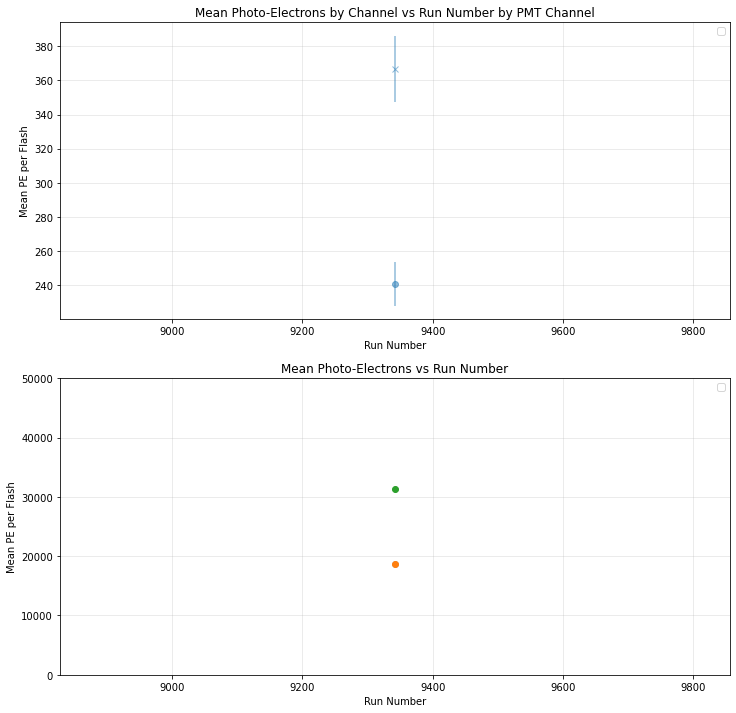

In [35]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.xlabel('Run Number')
plt.ylabel('Mean PE per Flash')
plt.title('Mean Photo-Electrons by Channel vs Run Number by PMT Channel')
plt.grid(True, alpha=0.3)

# Calculate mean PE for each PMT channel in each run
run_means = {}
run_stds = {}
run_meansRecal = {}
run_stdsRecal = {}
run_totalMean = {}
run_totalMeanRecal = {}
run_totalStd = {}
run_totalStdRecal = {}
sorted_runs = sorted(norm_pe.keys())

for run_num in sorted_runs:
    pe_data = norm_pe[run_num]
    pe_dataRecal = recal_pe[run_num]
    if len(pe_data) == 0:
        continue
    pe_dataSum = np.sum(pe_data, axis=1)
    pe_dataSumRecal = np.sum(pe_dataRecal, axis=1)
    
    # Each flash has 360 PMT values, so reshape accordingly
    n_pmts = 360    
    n_flashes = len(pe_data) #// n_pmts
    #print("Number of flashes in run ", run_num, " is ", n_flashes)
    
    if n_flashes > 0:
        # Reshape and calculate mean for each PMT
        means = []
        stds = []
        meanRecal = []
        stdRecal = []
        for i in range(n_pmts):
            #if i == 0: print(pe_data, pe_data[:][i], np.mean(pe_data[:][i]))
            means.append(np.mean(pe_data[:, i][pe_data[:, i] >= 10]))
            stds.append(np.std(pe_data[:, i][pe_data[:, i] >= 10]) / np.sqrt(len(pe_data[:, i][pe_data[:, i] >= 10])))
            meanRecal.append(np.mean(pe_dataRecal[:, i][pe_dataRecal[:, i] >= 10]))
            stdRecal.append(np.std(pe_dataRecal[:, i][pe_dataRecal[:, i] >= 10]) / np.sqrt(len(pe_dataRecal[:, i][pe_dataRecal[:, i] >= 10])))
        run_means[run_num] = means
        run_stds[run_num] = stds
        run_meansRecal[run_num] = meanRecal
        run_stdsRecal[run_num] = stdRecal
        run_totalMean[run_num] = np.mean(pe_dataSum)
        run_totalMeanRecal[run_num] = np.mean(pe_dataSumRecal)
        run_totalStd[run_num] = np.std(pe_dataSum)
        run_totalStdRecal[run_num] = np.std(pe_dataSumRecal)

# Plot mean PE vs run number for first n PMT channels
for pmt_ch in range(1):
    color = f'C{pmt_ch}'
    mean_values = []
    run_numbers = []
    std_values = []
    meanRecal_values = []
    stdRecal_values = []
    
    for run_num in sorted_runs:
        if run_num in run_means and len(run_means[run_num]) > pmt_ch:
            mean_values.append(run_means[run_num][pmt_ch])
            std_values.append(run_stds[run_num][pmt_ch])
            meanRecal_values.append(run_meansRecal[run_num][pmt_ch])
            stdRecal_values.append(run_stdsRecal[run_num][pmt_ch])
            run_numbers.append(run_num)
    
    if len(mean_values) > 0:
        plt.errorbar(run_numbers, mean_values, yerr=std_values, marker='o', color=color, alpha=0.5)
        plt.errorbar(run_numbers, meanRecal_values, yerr=stdRecal_values, marker='x', color=color, alpha=0.5)

    # Add linear fit
    if len(run_numbers) > 1:  # Need at least 2 points for a fit
        coeffs = np.polyfit(run_numbers, mean_values, 1)
        slope = coeffs[0]
        # Calculate the covariance matrix to get the error on the slope
        cov_matrix = np.polyfit(run_numbers, mean_values, 1, cov=True)[1]
        slope_error = np.sqrt(cov_matrix[0, 0])
        
        # Draw the fit line with the same color
        fit_line = np.poly1d(coeffs)
        plt.plot(run_numbers, fit_line(run_numbers), '--', marker='o', color=color, alpha=0.7, label=f'Channel {pmt_ch} (slope: {slope:.2e}±{slope_error:.2e})')
        #plt.plot([], [], marker='o', color=color, )

        coeffsRecal = np.polyfit(run_numbers, meanRecal_values, 1)
        slopeRecal = coeffsRecal[0]
        # Calculate the covariance matrix to get the error on the slope
        cov_matrixRecal = np.polyfit(run_numbers, meanRecal_values, 1, cov=True)[1]
        slope_errorRecal = np.sqrt(cov_matrixRecal[0, 0])

        # Draw the fit line with the same color
        fit_lineRecal = np.poly1d(coeffsRecal)
        plt.plot(run_numbers, fit_lineRecal(run_numbers), '-.', marker='o', color=color, alpha=0.7, label=f'Channel {pmt_ch} Recalibrated (slope: {slopeRecal:.2e}±{slope_errorRecal:.2e})')


# Calculate mean sum_pe for each run
meanSum = []
sigmaSum = []
plotRuns = []
for run_num in sorted_runs:
    sum_pe_data = sum_pe[run_num]
    if len(sum_pe_data) == 0:
        #meanSum.append(0)
        #sigmaSum.append(0)
        continue
    meanSum.append(np.mean(sum_pe_data))
    sigmaSum.append(np.std(sum_pe_data))
    plotRuns.append(run_num)
    #print("run: ", run_num, " mean sum pe: ", meanSum[-1], " std: ", sigmaSum[-1], " entries: ", len(sum_pe_data))
plt.legend()

weights = 1/np.array(sigmaSum)
weightsSum = 1/np.array(list(run_totalStd.values()))
weightsSumRecal = 1/np.array(list(run_totalStdRecal.values()))
# Plot the second subplot after the first subplot is complete
plt.subplot(2, 1, 2)
plt.scatter(plotRuns, meanSum, alpha=0.3) #total mean PE per flash
plt.scatter(run_totalMean.keys(), run_totalMean.values(), alpha=1) #total mean PE per flash (summed from all PMTs)
plt.scatter(run_totalMeanRecal.keys(), run_totalMeanRecal.values(), alpha=1) #total mean PE per flash (summed from all PMTs, recalibrated)

# Add linear fit
if len(plotRuns) > 1:  # Need at least 2 points for a fit
    coeffs = np.polyfit(plotRuns, meanSum, 1, w=weights, cov=True)
    slope = coeffs[0][0]  # coeffs is now a tuple (coefficients, covariance_matrix)
    intercept = coeffs[0][1]
    slope_error = np.sqrt(coeffs[1][0, 0])  # Extract slope error from covariance matrix
    # Draw the fit line
    fit_line = np.poly1d(coeffs[0])  # Use coefficients, not the tuple
    plt.plot(plotRuns, fit_line(plotRuns), color='C0', linestyle='--', alpha=0.7)
    plt.plot([], [], marker='o', color='C0', label=f'Sum PE (slope: {slope:.2e}±{slope_error:.2e})')

# Add linear fit
if len(run_totalMean.keys()) > 1:  # Need at least 2 points for a fit
    coeffs = np.polyfit(list(run_totalMean.keys()), list(run_totalMean.values()), 1, w=weightsSum, cov=True)
    slope = coeffs[0][0]  # coeffs is now a tuple (coefficients, covariance_matrix)
    intercept = coeffs[0][1]
    slope_error = np.sqrt(coeffs[1][0, 0])  # Extract slope error from covariance matrix
    # Draw the fit line
    fit_line = np.poly1d(coeffs[0])  # Use coefficients, not the tuple
    plt.plot(list(run_totalMean.keys()), fit_line(list(run_totalMean.keys())), color='C1', linestyle='--', alpha=0.7)
    plt.plot([], [], marker='o', color='C1', label=f'PMT Sum (constructed) (slope: {slope:.2e}±{slope_error:.2e})')

# Add linear fit
if len(run_totalMeanRecal.keys()) > 1:  # Need at least 2 points for a fit
    coeffs = np.polyfit(list(run_totalMeanRecal.keys()), list(run_totalMeanRecal.values()), 1, w=weightsSumRecal, cov=True)
    slope = coeffs[0][0]  # coeffs is now a tuple (coefficients, covariance_matrix)
    intercept = coeffs[0][1]
    slope_error = np.sqrt(coeffs[1][0, 0])  # Extract slope error from covariance matrix
    # Draw the fit line
    fit_line = np.poly1d(coeffs[0])  # Use coefficients, not the tuple
    plt.plot(list(run_totalMeanRecal.keys()), fit_line(list(run_totalMeanRecal.keys())), color='C2', linestyle='--', alpha=0.7)
    plt.plot([], [], marker='o', color='C2', label=f'PMT Sum Recal (constructed) (slope: {slope:.2e}±{slope_error:.2e})')

plt.xlabel('Run Number')
plt.ylabel('Mean PE per Flash')
plt.ylim(0, 50e3)
plt.title('Mean Photo-Electrons vs Run Number')
plt.legend()
plt.grid(True, alpha=0.3)



In [ ]:
from scipy.optimize import curve_fit
import imageio
import os

# Create directory for individual plots
plot_dir = '/nashome/m/micarrig/icarus/pmt/v10_06_00_01p04/sum_pe_plots'
os.makedirs(plot_dir, exist_ok=True)

# Store filenames for GIF creation
filenames = []

# Get sorted list of runs
sorted_runs = sorted(norm_pe.keys())

# Loop through all runs
for run_num in sorted_runs:
    if len(sum_pe[run_num]) == 0:
        continue
        
    plt.figure(figsize=(10, 6))
    plt.hist(sum_pe[run_num], bins=100, range=(0, 50000), histtype='stepfilled', alpha=0.7)
    plt.xlabel('Sum PE per Flash')
    plt.ylabel('Counts')
    plt.title(f'Sum PE Distribution for Run {run_num}')
    
    # Use the same data for both histogram and fitting
    data_array = sum_pe[run_num]
    
    # Calculate histogram for fitting with matching range
    counts, bin_edges = np.histogram(data_array, bins=100, range=(0, 50000))
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Remove bins with zero counts for better fitting
    mask = counts > 0
    counts_filtered = counts[mask]
    bin_centers_filtered = bin_centers[mask]
    
    # Gaussian function
    def gaussian(x, amplitude, mean, sigma):
        return amplitude * np.exp(-0.5 * ((x - mean) / sigma)**2)
    
    # Initial parameter guesses based on actual data
    initial_guess = [np.max(counts_filtered), np.mean(data_array), np.std(data_array)]
    
    try:
        # Fit gaussian with filtered data
        popt, pcov = curve_fit(gaussian, bin_centers_filtered, counts_filtered, p0=initial_guess)
        
        # Plot the fit over the full range
        x_fit = np.linspace(0, 50000, 5000)
        y_fit = gaussian(x_fit, *popt)
        plt.plot(x_fit, y_fit, 'r-', linewidth=2, 
                label=f'Gaussian Fit\nμ={popt[1]:.0f}, σ={popt[2]:.0f}')
        plt.legend()
    except Exception as e:
        print(f"Gaussian fit failed for run {run_num}: {e}")

    plt.grid(True, alpha=0.3)
    
    # Save plot
    filename = f'{plot_dir}/run_{run_num:05d}.png'
    plt.savefig(filename, dpi=100, bbox_inches='tight')
    filenames.append(filename)
    plt.close()  # Close to save memory
    
    print(f"Processed run {run_num}, mean: {np.mean(sum_pe[run_num]):.0f}, std: {np.std(sum_pe[run_num]):.0f}")

In [ ]:
# Create GIF
gif_filename = '/nashome/m/micarrig/icarus/pmt/v10_06_00_01p04/sum_pe_evolution.gif'
with imageio.get_writer(gif_filename, mode='I', duration=1) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

print(f"GIF created: {gif_filename}")
print(f"Total plots created: {len(filenames)}")

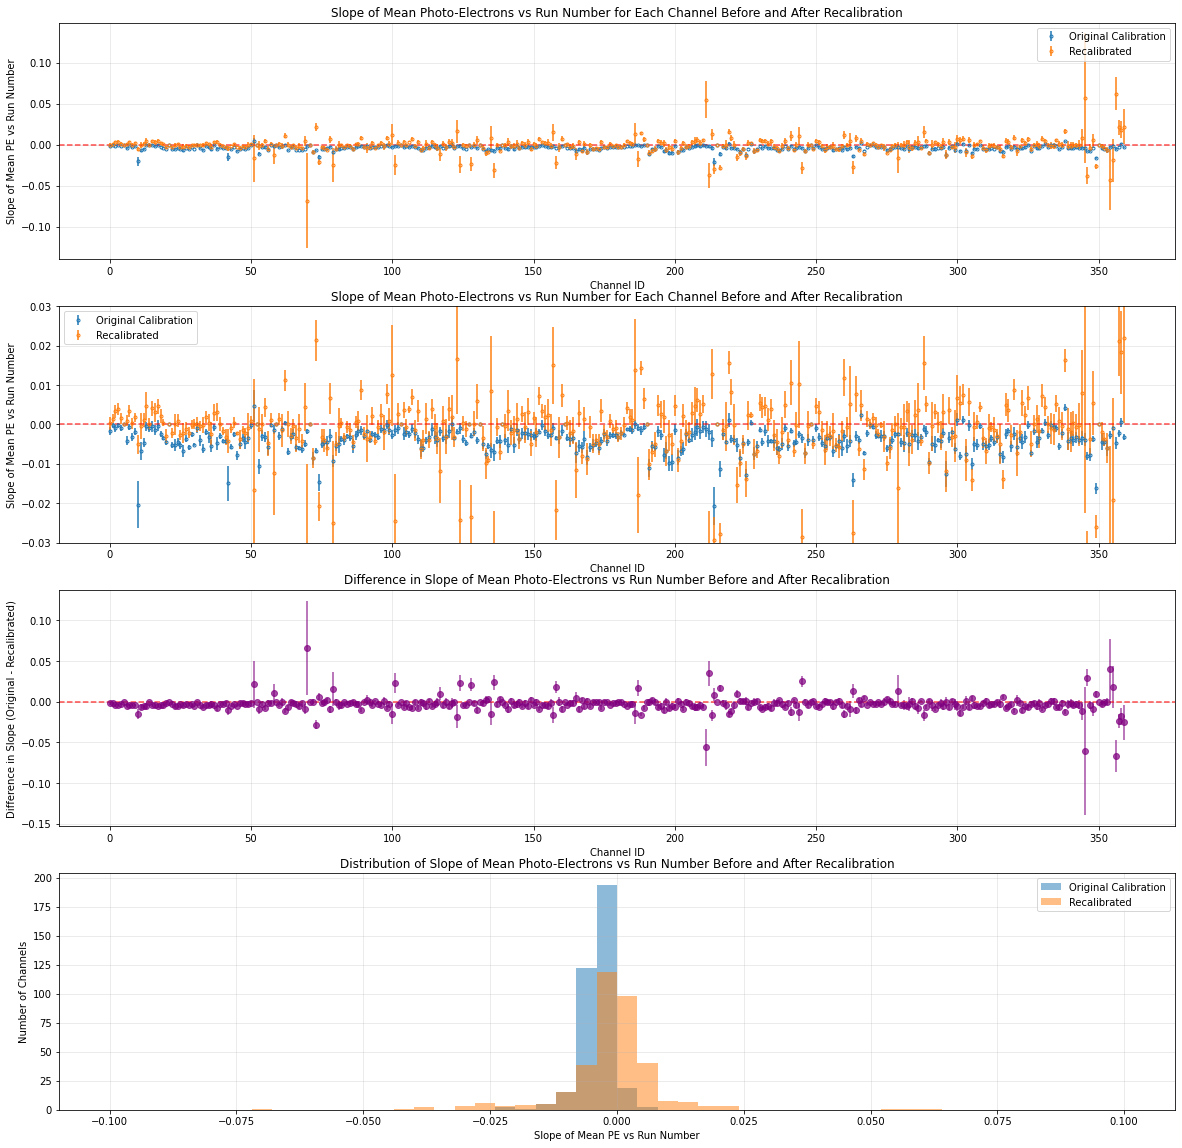

Outliers (Slope > 0.05):
Outliers (Recalibrated Slope > 0.05):
Channel 70: -6.80e-02 ± 5.80e-02
Channel 211: 5.48e-02 ± 2.23e-02
Channel 345: 5.66e-02 ± 7.92e-02
Channel 356: 6.20e-02 ± 2.01e-02


In [155]:
# Plot mean PE vs run number slope before/after recalibration

class ChannelSlope:
    def __init__(self, channel_id, slope, slope_err, slopeRecal=None, slopeErrRecal=None):
        self.channel_id = channel_id
        self.slope = slope
        self.slope_err = slope_err
        self.slopeRecal = slopeRecal
        self.slopeErrRecal = slopeErrRecal

channelSlopes = []

for pmt_ch in range(400):
    color = f'C{pmt_ch}'
    mean_values = []
    run_numbers = []
    std_values = []
    meanRecal_values = []
    stdRecal_values = []
    
    for run_num in sorted_runs:
        if run_num in run_means and len(run_means[run_num]) > pmt_ch:
            mean_values.append(run_means[run_num][pmt_ch])
            std_values.append(run_stds[run_num][pmt_ch])
            meanRecal_values.append(run_meansRecal[run_num][pmt_ch])
            stdRecal_values.append(run_stdsRecal[run_num][pmt_ch])
            run_numbers.append(run_num)
    
    # Add linear fit
    if len(run_numbers) > 1:  # Need at least 2 points for a fit
        
        coeffs = np.polyfit(run_numbers, mean_values, 1)
        slope = coeffs[0]
        cov_matrix = np.polyfit(run_numbers, mean_values, 1, cov=True)[1]
        slope_error = np.sqrt(cov_matrix[0, 0])

        coeffsRecal = np.polyfit(run_numbers, meanRecal_values, 1)
        slopeRecal = coeffsRecal[0]
        cov_matrixRecal = np.polyfit(run_numbers, meanRecal_values, 1, cov=True)[1]
        slope_errorRecal = np.sqrt(cov_matrixRecal[0, 0])

        channelSlopes.append(ChannelSlope(pmt_ch, slope, slope_error, slopeRecal, slope_errorRecal))

channelSlopes.sort(key=lambda x: x.channel_id)

plt.figure(figsize=(20, 20))
plt.subplot(4, 1, 1)
plt.errorbar([ch.channel_id for ch in channelSlopes], [ch.slope for ch in channelSlopes], yerr=[ch.slope_err for ch in channelSlopes], fmt='.', alpha=1, label='Original Calibration', fillstyle='none')
plt.errorbar([ch.channel_id for ch in channelSlopes], [ch.slopeRecal for ch in channelSlopes], yerr=[ch.slopeErrRecal for ch in channelSlopes], fmt='.', alpha=1, label='Recalibrated', fillstyle='none')
plt.xlabel('Channel ID')
plt.ylabel('Slope of Mean PE vs Run Number')
plt.title('Slope of Mean Photo-Electrons vs Run Number for Each Channel Before and After Recalibration')
plt.grid(True, alpha=0.3)
plt.axhline(0, color='red', linestyle='--', alpha=0.7)
plt.legend()
plt.subplot(4, 1, 2)
plt.errorbar([ch.channel_id for ch in channelSlopes], [ch.slope for ch in channelSlopes], yerr=[ch.slope_err for ch in channelSlopes], fmt='.', alpha=1, label='Original Calibration', fillstyle='none')
plt.errorbar([ch.channel_id for ch in channelSlopes], [ch.slopeRecal for ch in channelSlopes], yerr=[ch.slopeErrRecal for ch in channelSlopes], fmt='.', alpha=1, label='Recalibrated', fillstyle='none')
plt.xlabel('Channel ID')
plt.ylabel('Slope of Mean PE vs Run Number')
plt.title('Slope of Mean Photo-Electrons vs Run Number for Each Channel Before and After Recalibration')
plt.grid(True, alpha=0.3)
plt.axhline(0, color='red', linestyle='--', alpha=0.7)
plt.ylim(-0.03, 0.03)
plt.legend()
plt.subplot(4, 1, 3)
plt.errorbar([ch.channel_id for ch in channelSlopes], [ch.slope - ch.slopeRecal for ch in channelSlopes], yerr=[np.sqrt(ch.slope_err**2 + ch.slopeErrRecal**2) for ch in channelSlopes], fmt='o', alpha=0.7, color='purple')
plt.xlabel('Channel ID')
plt.ylabel('Difference in Slope (Original - Recalibrated)')
plt.title('Difference in Slope of Mean Photo-Electrons vs Run Number Before and After Recalibration')
plt.grid(True, alpha=0.3)
plt.axhline(0, color='red', linestyle='--', alpha=0.7)
plt.subplot(4, 1, 4)
plt.hist([ch.slope for ch in channelSlopes], bins=50, range=(-0.1, 0.1), alpha=0.5, label='Original Calibration')
plt.hist([ch.slopeRecal for ch in channelSlopes], bins=50, range=(-0.1, 0.1), alpha=0.5, label='Recalibrated')
plt.xlabel('Slope of Mean PE vs Run Number')
plt.ylabel('Number of Channels')
plt.title('Distribution of Slope of Mean Photo-Electrons vs Run Number Before and After Recalibration')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

outliers = [ch for ch in channelSlopes if abs(ch.slope) > 0.05]
print("Outliers (Slope > 0.05):")
for ch in outliers:
    print(f"Channel {ch.channel_id}: {ch.slope:.2e} ± {ch.slope_err:.2e}")
outliersRecal = [ch for ch in channelSlopes if abs(ch.slopeRecal) > 0.05]
print("Outliers (Recalibrated Slope > 0.05):")
for ch in outliersRecal:
    print(f"Channel {ch.channel_id}: {ch.slopeRecal:.2e} ± {ch.slopeErrRecal:.2e}")

In [148]:
# check slopes for outliers

def plot_channel_slope(pmt_ch):

    plt.figure(figsize=(15, 8))
    plt.xlabel('Run Number')
    plt.ylabel('Mean PE per Flash')
    plt.title(f'Mean Photo-Electrons vs Run Number for Channel {pmt_ch}')
    plt.grid(True, alpha=0.3)
    mean_values = []
    run_numbers = []
    std_values = []
    meanRecal_values = []
    stdRecal_values = []

    
    for run_num in sorted_runs:
        #if run_num == 9383: continue
        if run_num in run_means and len(run_means[run_num]) > pmt_ch:
            mean_values.append(run_means[run_num][pmt_ch])
            std_values.append(run_stds[run_num][pmt_ch])
            meanRecal_values.append(run_meansRecal[run_num][pmt_ch])
            stdRecal_values.append(run_stdsRecal[run_num][pmt_ch])
            run_numbers.append(run_num)
    
    chGains = [newGains[run][pmt_ch] for run in run_numbers]

    print(run_numbers, meanRecal_values)
    if len(mean_values) > 0:
        plt.errorbar(run_numbers, mean_values, yerr=std_values, marker='o', color='blue', alpha=0.7, linestyle='None')
        plt.errorbar(run_numbers, meanRecal_values, yerr=stdRecal_values, marker='o', color='orange', alpha=0.7, linestyle='None', fillstyle='full')

    # Add linear fit
    if len(run_numbers) > 1:  # Need at least 2 points for a fit
        coeffs = np.polyfit(run_numbers, mean_values, 1)
        slope = coeffs[0]
        # Calculate the covariance matrix to get the error on the slope
        cov_matrix = np.polyfit(run_numbers, mean_values, 1, cov=True)[1]
        slope_error = np.sqrt(cov_matrix[0, 0])
        
        # Draw the fit line with the same color
        fit_line = np.poly1d(coeffs)
        plt.plot(run_numbers, fit_line(run_numbers), '--', color='blue', alpha=0.7)
        plt.plot([], [], marker='o', color='blue', label=f'Channel {pmt_ch} (slope: {slope:.2e}±{slope_error:.2e})')

        coeffsRecal = np.polyfit(run_numbers, meanRecal_values, 1)
        slopeRecal = coeffsRecal[0]
        # Calculate the covariance matrix to get the error on the slope
        cov_matrixRecal = np.polyfit(run_numbers, meanRecal_values, 1, cov=True)[1]
        slope_errorRecal = np.sqrt(cov_matrixRecal[0, 0])

        # Draw the fit line with the same color
        fit_lineRecal = np.poly1d(coeffsRecal)
        plt.plot(run_numbers, fit_lineRecal(run_numbers), '-.', color='orange', alpha=0.7)
        plt.plot([], [], marker='o', color='orange', label=f'Channel {pmt_ch} Recalibrated (slope: {slopeRecal:.2e}±{slope_errorRecal:.2e})', fillstyle='full')

    # Create secondary y-axis for gain values
    ax1 = plt.gca()
    ax2 = ax1.twinx()
    ax2.plot(run_numbers, chGains, marker='x', color='green', alpha=0.7, linestyle='None', label='sPE Area')
    ax2.set_ylabel('sPE Area', color='green')
    ax2.tick_params(axis='y', labelcolor='green')
    
    # Combine legends from both axes
    handles1, labels1 = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(handles1 + handles2, labels1 + labels2, loc='lower right')
    
    # Add the gain label to the main legend
    #plt.plot([], [], marker='x', color='green', alpha=0.7, linestyle='None', label='sPE Gain')
    
    #plt.legend()
    plt.show()

[9342, 9383, 9384, 9448, 9745, 9746, 10097] [174.46722969783718, 73.58569225828197, 66.47803980357108, 65.98239041371177, 65.30775325061519, 66.56232884004778, 59.465922382331215]


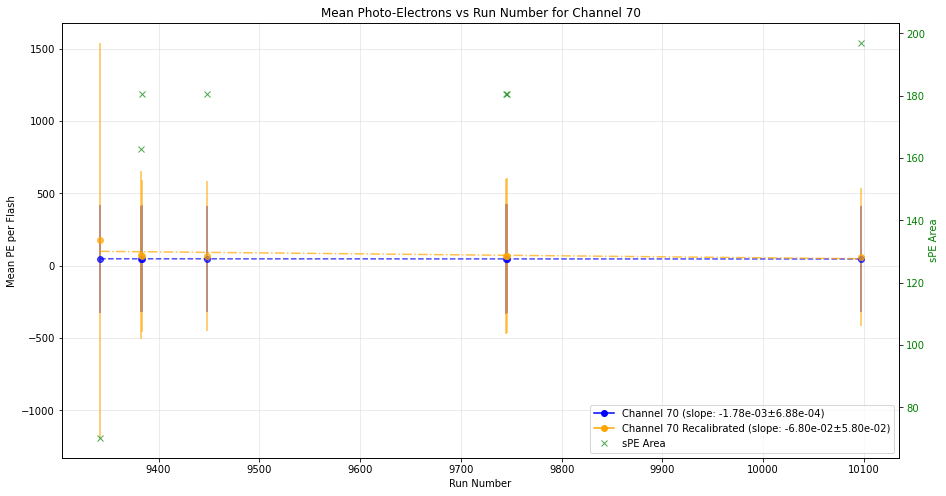

In [149]:
plot_channel_slope(outliersRecal[0].channel_id)

[9342, 9383, 9384, 9448, 9745, 9746, 10097] [84.02130175473505, 104.3296182327351, 94.34940945345143, 91.65020165217902, 91.80870416144641, 91.38721578997001, 145.567867087781]


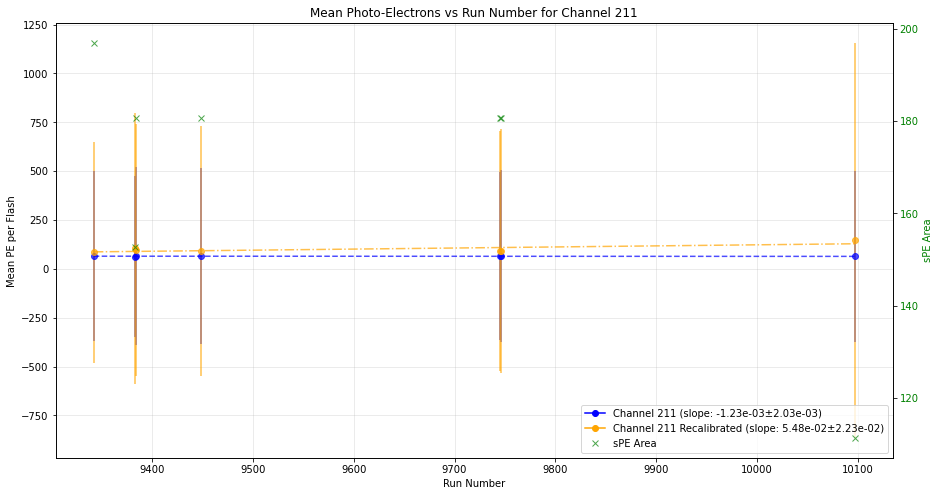

In [150]:
plot_channel_slope(outliersRecal[1].channel_id)

[9342, 9383, 9384, 9448, 9745, 9746, 10097] [84.7730250805889, 88.17072495278423, 73.96733666618094, 72.05837122074922, 216.11700097059227, 68.62750220374306, 96.23976346137432]


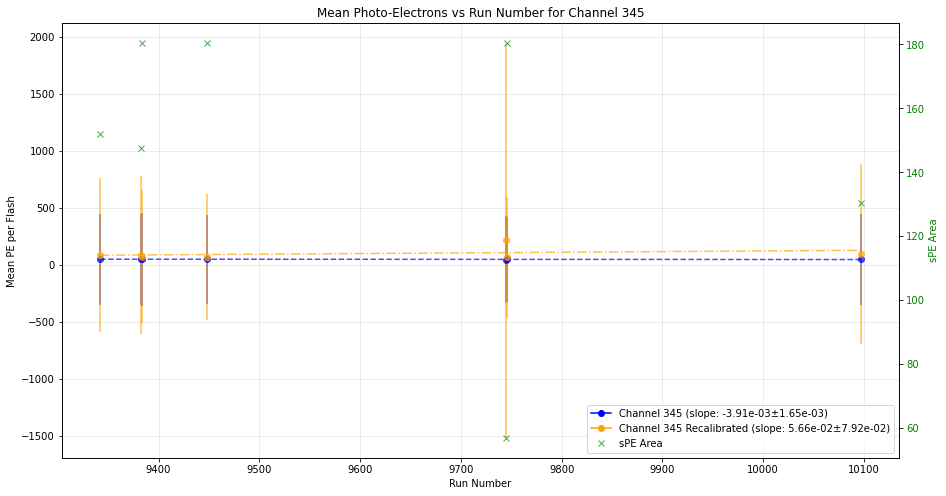

In [151]:
plot_channel_slope(outliersRecal[2].channel_id)

[9342, 9383, 9384, 9448, 9745, 9746, 10097] [90.57673342112982, 75.76041696604267, 111.53070515126906, 116.01211005031321, 113.42075252854951, 116.30726232585693, 143.59531991622137]


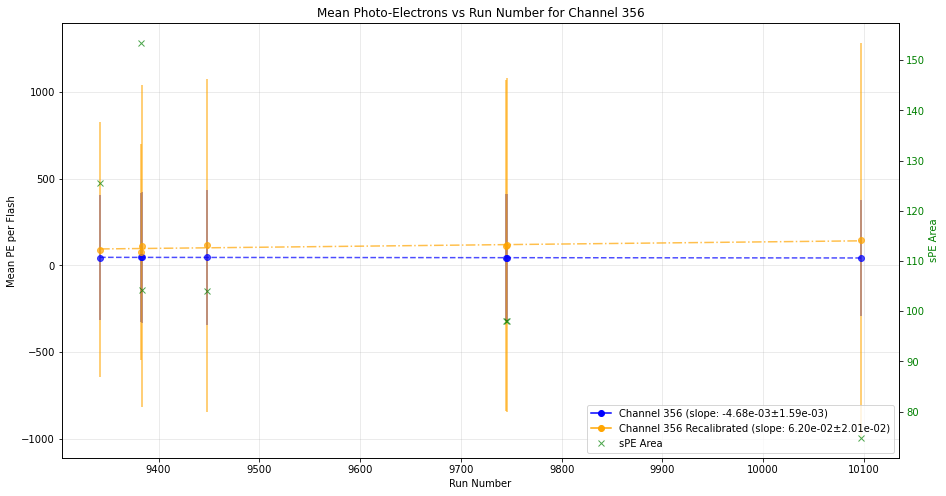

In [156]:
plot_channel_slope(outliersRecal[3].channel_id)

### Old Code (Junk)

Text(0.5, 0, 'Area')

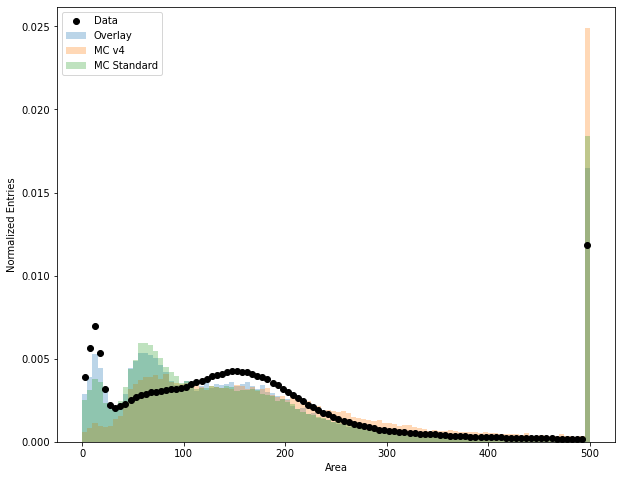

In [4]:
plt.figure(figsize=(10, 8))  # Width and height are in inches
var = 'integral'
bins = 100
range = (0, 500)

datasets = {
    'Overlay': ak.flatten(t_overlay[var].array()),
    'MC v4': ak.flatten(t_mcv4[var].array()),
    'MC Standard': ak.flatten(t_mc[var].array()),
    'Data': ak.flatten(t_data[var].array())
}

for label, data in datasets.items():
    # Flatten and convert to NumPy
    data = ak.to_numpy(data)
    
    # Count underflow and overflow
    underflow = np.sum(data < range[0])
    overflow = np.sum(data > range[1])
    
    # Compute histogram
    counts, bin_edges = np.histogram(data, bins=bins, range=range, density=False)
    
    # Add underflow to the first bin and overflow to the last bin
    counts[0] += underflow
    counts[-1] += overflow
    
    # Normalize the histogram manually
    bin_width = bin_edges[1] - bin_edges[0]
    total_area = np.sum(counts) * bin_width
    normalized_counts = counts / total_area
    
    # Plot the histogram
    if label == 'Data':
        plt.scatter(bin_edges[:-1] + bin_width / 2, normalized_counts, label=label, color='black')
    else:
        plt.bar(bin_edges[:-1], normalized_counts, width=bin_width, align='edge', alpha=0.3, label=label)

plt.legend()
plt.ylabel('Normalized Entries')
plt.xlabel("Area")

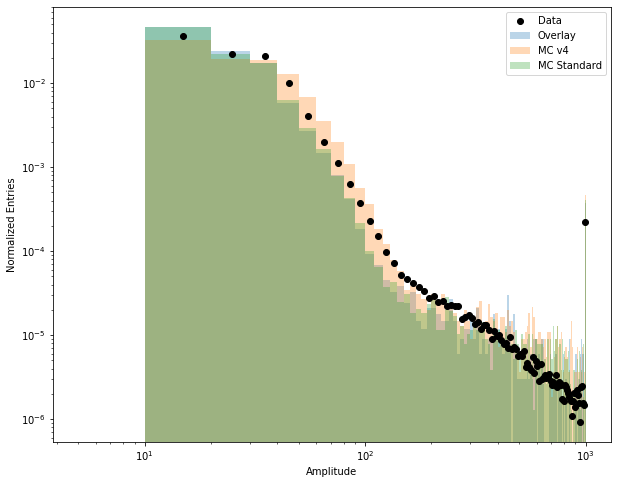

In [5]:
plt.figure(figsize=(10, 8))  # Width and height are in inches
var = 'amplitude'
bins = 100
range = (0, 1000)

datasets = {
    'Overlay': ak.flatten(t_overlay[var].array()),
    'MC v4': ak.flatten(t_mcv4[var].array()),
    'MC Standard': ak.flatten(t_mc[var].array()),
    'Data': ak.flatten(t_data[var].array())
}

for label, data in datasets.items():
    # Flatten and convert to NumPy
    data = ak.to_numpy(data)
    
    # Count underflow and overflow
    underflow = np.sum(data < range[0])
    overflow = np.sum(data > range[1])
    
    # Compute histogram
    counts, bin_edges = np.histogram(data, bins=bins, range=range, density=False)
    
    # Add underflow to the first bin and overflow to the last bin
    counts[0] += underflow
    counts[-1] += overflow
    
    # Normalize the histogram manually
    bin_width = bin_edges[1] - bin_edges[0]
    total_area = np.sum(counts) * bin_width
    normalized_counts = counts / total_area
    
    # Plot the histogram
    if label == 'Data':
        plt.scatter(bin_edges[:-1] + bin_width / 2, normalized_counts, label=label, color='black')
    else:
        plt.bar(bin_edges[:-1], normalized_counts, width=bin_width, align='edge', alpha=0.3, label=label)

plt.legend()
plt.ylabel('Normalized Entries')
plt.xlabel("Amplitude")
plt.yscale('log')
plt.xscale('log')

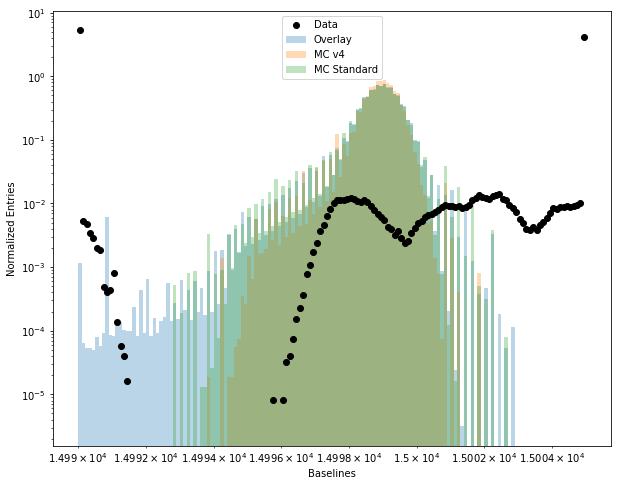

In [3]:
plt.figure(figsize=(10, 8))  # Width and height are in inches
var = 'baselines'
bins = 150
range = (14990, 15005)

datasets = {
    'Overlay': uproot.iterate("stage0_overlay_tree.root:mcana/mcwfs", [var], step_size="10 MB"),
    'MC v4': uproot.iterate("stage0_mcv4_tree.root:mcana/mcwfs", [var], step_size="10 MB"),
    'MC Standard': uproot.iterate("stage0_mc_tree.root:mcana/mcwfs", [var], step_size="10 MB"),
    'Data': uproot.iterate("stage0_data_tree.root:mcana/mcwfs", [var], step_size="10 MB")
}

for label, data in datasets.items():
    for batch in data:
        # Flatten and convert to NumPy
        data_array = ak.flatten(batch[var])
        data_array = ak.to_numpy(data_array)
        
        # Count underflow and overflow
        underflow = np.sum(data_array < range[0])
        overflow = np.sum(data_array > range[1])
        
        # Compute histogram
        counts, bin_edges = np.histogram(data_array, bins=bins, range=range, density=False)
        
        # Add underflow to the first bin and overflow to the last bin
        counts[0] += underflow
        counts[-1] += overflow
        
        # Normalize the histogram manually
        bin_width = bin_edges[1] - bin_edges[0]
        total_area = np.sum(counts) * bin_width
        normalized_counts = counts / total_area
        
    # Plot the histogram
    if label == 'Data':
        plt.scatter(bin_edges[:-1] + bin_width / 2, normalized_counts, label=label, color='black')
    else:
        plt.bar(bin_edges[:-1], normalized_counts, width=bin_width, align='edge', alpha=0.3, label=label)

plt.legend()
plt.ylabel('Normalized Entries')
plt.xlabel("Baselines")
plt.yscale('log')
plt.xscale('log')



Text(0.5, 0, 'Rise Time')

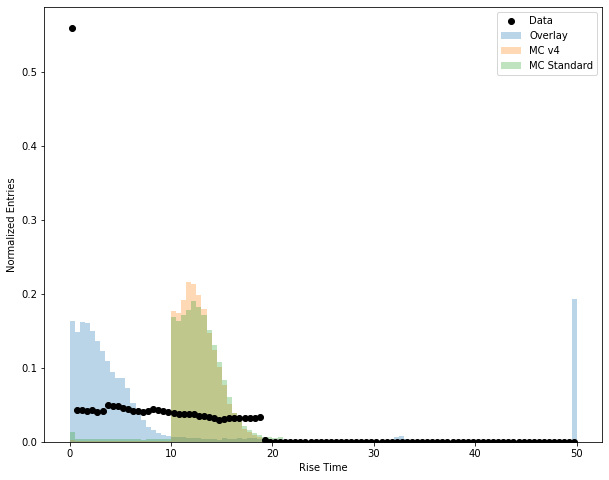

In [20]:
plt.figure(figsize=(10, 8))  # Width and height are in inches
var = 'rise_time'
bins = 100
range = (0, 50)

datasets = {
    'Overlay': uproot.iterate("stage0_overlay_tree.root:mcana/mcwfs", [var], step_size="100 MB"),
    'MC v4': uproot.iterate("stage0_mcv4_tree.root:mcana/mcwfs", [var], step_size="100 MB"),
    'MC Standard': uproot.iterate("stage0_mc_tree.root:mcana/mcwfs", [var], step_size="100 MB"),
    'Data': uproot.iterate("stage0_data_tree.root:mcana/mcwfs", [var], step_size="100 MB")
}

for label, data in datasets.items():
    for batch in data:
        # Flatten and convert to NumPy
        data_array = ak.flatten(batch[var])
        data_array = ak.to_numpy(data_array)
        
        # Count underflow and overflow
        underflow = np.sum(data_array < range[0])
        overflow = np.sum(data_array > range[1])
        
        # Compute histogram
        counts, bin_edges = np.histogram(data_array, bins=bins, range=range, density=False)
        
        # Add underflow to the first bin and overflow to the last bin
        counts[0] += underflow
        counts[-1] += overflow
        
        # Normalize the histogram manually
        bin_width = bin_edges[1] - bin_edges[0]
        total_area = np.sum(counts) * bin_width
        normalized_counts = counts / total_area
        
    # Plot the histogram
    if label == 'Data':
        plt.scatter(bin_edges[:-1] + bin_width / 2, normalized_counts, label=label, color='black')
    else:
        plt.bar(bin_edges[:-1], normalized_counts, width=bin_width, align='edge', alpha=0.3, label=label)

plt.legend()
plt.ylabel('Normalized Entries')
plt.xlabel("Rise Time")
#plt.yscale('log')
#plt.xscale('log')

